# Pandas all

In [3]:
import numpy as np
import pandas as pd
import xlwings as xw

import sys

pd.set_option('display.max_columns', None) 
pd.set_option('display.max_rows', None)

## Notes
---

```python
while reading the file-->the blank cells are filled with NaN values and NaN is treated as float. So a col of interger will assume dtype of float(2.0,5.0, NaN, 10.0)
```

 UserWarning: Boolean Series key will be reindexed to match DataFrame index.

The warning message you're seeing is related to indexing a DataFrame using a boolean Series. Let me break it down for you:

1. **Boolean Series Key**: This refers to a Series (a column) in your DataFrame that contains boolean values (True or False). For example, if you have a column called "Claim Type" with values like "Reimbursement" or "Not Reimbursement," that would be a boolean Series.

2. **Reindexing**: When you use a boolean Series to index a DataFrame (like `claims_df['Claim Type']=='Reimbursement'`), Pandas needs to align the index of the boolean Series with the index of the DataFrame. If they don't match, you'll see this warning.

Certainly! Let's break it down with a simple example:

Suppose you have a DataFrame called `claims_df` that looks like this:

| Claim ID | Claim Type    | Amount |
|----------|---------------|--------|
| 1        | Reimbursement | 100    |
| 2        | Expense       | 200    |
| 3        | Reimbursement | 150    |
| 4        | Expense       | 50     |

Now, you want to create a new DataFrame containing only the rows where the "Claim Type" is "Reimbursement." You might try this code:

```python
rb_claims_df = claims_df[claims_df['Claim Type'] == 'Reimbursement']
```

But if the index of `claims_df` doesn't match the index of the boolean Series (`claims_df['Claim Type'] == 'Reimbursement'`), you'll get the warning you mentioned.

Here's what happens step by step:

1. The boolean Series `claims_df['Claim Type'] == 'Reimbursement'` evaluates to:
   ```
   0     True
   1    False
   2     True
   3    False
   Name: Claim Type, dtype: bool
   ```

2. When you use this boolean Series to index `claims_df`, Pandas tries to align the indices. But the indices don't match because the boolean Series has its own default index (0, 1, 2, 3), while `claims_df` has its own index (0, 1, 2, 3).

3. To avoid the warning, you can use `.loc[]` to explicitly specify the index alignment:
   ```python
   rb_claims_df = claims_df.loc[claims_df['Claim Type'] == 'Reimbursement']
   ```

   This will create a new DataFrame (`rb_claims_df`) with only the rows where the "Claim Type" is "Reimbursement."

Remember, the key takeaway is to use `.loc[]` or `.iloc[]` when filtering rows based on a boolean condition to ensure proper index alignment. 😊


```python
maternity_perc_cy.select_dtypes(exclude=['object','datetime'])
```

*axis in pandas*

```python
import pandas as pd
import numpy as np
df = pd.DataFrame(np.random.randn(1,2),columns=list('AB'))

|            |  A      |  B     |
|------------|---------|--------|
|      0     | 0.626386| 1.52325|

for the below code
df.mean(axis=1)
output is 
0    1.074821
dtype: float64
According to the reference of pandas, axis=1 stands for columns and I expect the result of the command to be
A    0.626386
B    1.523255
dtype: float64

Also, 
If I do df.drop("A", axis = 1) then the A column will be dropped. It is not "along the row" nor "row-wise" but dropping column A.
_____ _______________________________________________________

axis=0--> from Top to Bottom || act on all the ROWS in each COLUMN || cover all the row of each column || means along "indexes". It's a row-wise operation.
axis=1--> from Left to Right || act on all the Columns in each Row || cover all the columns of each row.

+------------+---------+--------+
|            |  A      |  B     |
+------------+---------+---------
|      0     | 0.626386| 1.52325|----axis=1----->
+------------+---------+--------+
             |         |
             | axis=0  |
             ↓         ↓

```
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

```python
df.mean(axis=1)

And a mean/any aggregation on **axis=0** will be the mean of all the rows in each column.
    Let us understand this with an example. We have a dataframe df and it has shape as (5, 10), meaning it has 5 rows and 10 columns.
    if we do df.mean(axis=0) it means that dimension 0 would be changed, meaning the number of rows would be changed but the number of columns would remain the same, hence the result would be of shape (1, 10).


So, a mean/any aggregation on **axis=1** will be a mean of all the columns in each row.
    when we do df.mean(axis=1) it means that dimension 1 would be changed, this implies that it would have the same number of rows but a different number of columns. Hence the result that would get would be of the shape (5, 1).

also for ```df.drop("A", axis = 1)``` --> it will search for "A" from Left to Right i.e. along all the columns & if A is find in the column list then that column is deleted.

You need to visualize it. axis=0 (or axis='rows' is horizontal axis). axis=1 (or axis='columns') is vertical axis. To take it further, if you use pandas method drop, to remove columns or rows, if you specify axis=1 you will be removing columns. If you specify axis=0 you will be removing rows from dataset. So if we have some pandas dataframe in variable df: df.drop(0, axis=0) will remove the whole first row of dataset df.drop('grades', axis=1) will remove column 'grades' from dataset.

+++++++++++

axis=0 means along "indexes". It's a row-wise operation.
Suppose, to perform concat() operation on dataframe1 & dataframe2, we will take dataframe1 & take out 1st row from dataframe1 and place into the new DF, then we take out another row from dataframe1 and put into new DF, we repeat this process until we reach to the bottom of dataframe1. Then, we do the same process for dataframe2.

Basically, stacking dataframe2 on top of dataframe1 or vice a versa.

E.g making a pile of books on a table or floor

axis=1 means along "columns". It's a column-wise operation.
Suppose, to perform concat() operation on dataframe1 & dataframe2, we will take out the 1st complete column(a.k.a 1st series) of dataframe1 and place into new DF, then we take out the second column of dataframe1 and keep adjacent to it (sideways), we have to repeat this operation until all columns are finished. Then, we repeat the same process on dataframe2. Basically, stacking dataframe2 sideways.

E.g arranging books on a bookshelf.
```
+++++++++++

axis refers to the dimension of the array, in the case of pd.DataFrames axis=0 is the dimension that points downwards and axis=1 the one that points to the right.

Example: Think of an ndarray with shape (3,5,7).
```python
a = np.ones((3,5,7))
a is a 3 dimensional ndarray, i.e. it has 3 axes ("axes" is plural of "axis"). The configuration of a will look like 3 slices of bread where each slice is of dimension 5-by-7. a[0,:,:] will refer to the 0-th slice, a[1,:,:] will refer to the 1-st slice etc.

a.sum(axis=0) will apply sum() along the 0-th axis of a. You will add all the slices and end up with one slice of shape (5,7).


a.sum(axis=0) is equivalent to
b = np.zeros((5,7))
for i in range(5):
    for j in range(7):
        b[i,j] += a[:,i,j].sum()
b and a.sum(axis=0) will both look like this


array([[ 3.,  3.,  3.,  3.,  3.,  3.,  3.],
       [ 3.,  3.,  3.,  3.,  3.,  3.,  3.],
       [ 3.,  3.,  3.,  3.,  3.,  3.,  3.],
       [ 3.,  3.,  3.,  3.,  3.,  3.,  3.],
       [ 3.,  3.,  3.,  3.,  3.,  3.,  3.]])

In a pd.DataFrame, axes work the same way as in numpy.arrays: axis=0 will apply sum() or any other reduction function for each column.


+++:::

This is based on @Safak's answer. The best way to understand the axes in pandas/numpy is to create a 3d array and check the result of the sum function along the 3 different axes.

 a = np.ones((3,5,7))
a will be:

    array([[[1., 1., 1., 1., 1., 1., 1.],
    [1., 1., 1., 1., 1., 1., 1.],
    [1., 1., 1., 1., 1., 1., 1.],
    [1., 1., 1., 1., 1., 1., 1.],
    [1., 1., 1., 1., 1., 1., 1.]],

   [[1., 1., 1., 1., 1., 1., 1.],
    [1., 1., 1., 1., 1., 1., 1.],
    [1., 1., 1., 1., 1., 1., 1.],
    [1., 1., 1., 1., 1., 1., 1.],
    [1., 1., 1., 1., 1., 1., 1.]],

   [[1., 1., 1., 1., 1., 1., 1.],
    [1., 1., 1., 1., 1., 1., 1.],
    [1., 1., 1., 1., 1., 1., 1.],
    [1., 1., 1., 1., 1., 1., 1.],
    [1., 1., 1., 1., 1., 1., 1.]]])
Now check out the sum of elements of the array along each of the axes:

 x0 = np.sum(a,axis=0)
 x1 = np.sum(a,axis=1)
 x2 = np.sum(a,axis=2)
will give you the following results:

   x0 :
   array([[3., 3., 3., 3., 3., 3., 3.],
        [3., 3., 3., 3., 3., 3., 3.],
        [3., 3., 3., 3., 3., 3., 3.],
        [3., 3., 3., 3., 3., 3., 3.],
        [3., 3., 3., 3., 3., 3., 3.]])

   x1 : 
   array([[5., 5., 5., 5., 5., 5., 5.],
   [5., 5., 5., 5., 5., 5., 5.],
   [5., 5., 5., 5., 5., 5., 5.]])

  x2 :
   array([[7., 7., 7., 7., 7.],
        [7., 7., 7., 7., 7.],
        [7., 7., 7., 7., 7.]])

N.B. In @zhangxaochen's answer, I find the phrases "along the rows" and "along the columns" slightly confusing. axis=0 should refer to "along each column", and axis=1 "along each row".

:::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::::

Axis in view of programming is the position in the shape tuple. Here is an example:

import numpy as np

a=np.arange(120).reshape(2,3,4,5)

a.shape
Out[3]: (2, 3, 4, 5)

np.sum(a,axis=0).shape
Out[4]: (3, 4, 5)

np.sum(a,axis=1).shape
Out[5]: (2, 4, 5)

np.sum(a,axis=2).shape
Out[6]: (2, 3, 5)

np.sum(a,axis=3).shape
Out[7]: (2, 3, 4)
Mean on the axis will cause that dimension to be removed.

Referring to the original question, the dff shape is (1,2). Using axis=1 will change the shape to (1,).

::::::::::::::::::::::
::::::::::::::::::::::
The problem with using axis= properly is for its use for 2 main different cases:

For computing an accumulated value, or rearranging (e. g. sorting) data.
For manipulating ("playing" with) entities (e. g. dataframes).
The main idea behind this answer is that for avoiding the confusion, we select either a number, or a name for specifying the particular axis, whichever is more clear, intuitive, and descriptive.

Pandas is based on NumPy, which is based on mathematics, particularly on n-dimensional matrices. Here is an image for common use of axes' names in math in the 3-dimensional space:

enter image description here This picture is for memorizing the axes' ordinal numbers only:

0 for x-axis,
1 for y-axis, and
2 for z-axis.
The z-axis is only for panels; for dataframes we will restrict our interest to the green-colored, 2-dimensional basic plane with x-axis (0, vertical), and y-axis (1, horizontal).

enter image description here It's all for numbers as potential values of axis= parameter.

The names of axes are 'index' (you may use the alias 'rows') and 'columns', and for this explanation it is NOT important the relation between these names and ordinal numbers (of axes), as everybody knows what the words "rows" and "columns" mean (and everybody here — I suppose — knows what the word "index" in pandas means).

And now, my recommendation:

If you want to compute an accumulated value, you may compute it from values located along axis 0 (or along axis 1) — use axis=0 (or axis=1).

Similarly, if you want to rearrange values, use the axis number of the axis, along which are located data for rearranging (e.g. for sorting).

If you want to manipulate (e.g. concatenate) entities (e.g. dataframes) — use axis='index' (synonym: axis='rows') or axis='columns' to specify the resulting change — index (rows) or columns, respectively.
(For concatenating, you will obtain either a longer index (= more rows), or more columns, respectively.)
::::::::::::::::::::::
::::::::::::::::::::::

I believe, the correct answer should be "it is complicated"

[1] The term "axis" iteself conjures different mental image in different people
lets say the y-axis, it should conjure up an image of something vertical. However, now think of a vertical line x=0. it is vertical line too, yet it is addressed by a value 0 on the x-axis.

Similarly, when we say axis='index' (meaning axis=0), are we saying the "vertical" direction that indexes reside on? or that one series of data addressed by an index value? Panda tends to mean the first meaning, the vertical direction.

[2] Pandas itself is not 100% consistent either, observe the following cases, they ALMOST have the same common theme:

# [1] piling dfs
pd.concat([df0, df1], axis='index') 
    # adding dfs on top of each other vertically like pilling up a column, 
    # but, we will use the word 'index'

# [2] for every column in df: operate on it
df.apply(foo, axis='index')     # apply func foo to one column at a time
df.mean('A', axis='index')      # apply "mean()" to one column at a time
a_boolean_df.all(axis='index')  # check if each column contains only bool "True"
    # apply an operation to a vertical slice of data, ie. a column, 
    # then apply the same operation to the next column on the right 
    # then to the right again... until the last column
    # but, we will use the word 'index'

# [3] delete a column or row of data
df.drop(axis='index', ...)
df.dropna(axis='index', ...)
    # this time, we are droping an index/row, a horizontal slice of data.
    # so OBVIOUSLY we will use the word 'index'

# [4] when you iterate thru a df naturally, what would show up first? a row or a column?
for x in df:
    # x == a column's name

# [5] drop duplicate
df.drop_duplicates(subset=['mycolumn0', 'mycolumn1']...)
    # thank God we don't need to deal with the "axis" bs in this
```



additional info about apndas axis
```python
>>> df = pd.DataFrame([[1, 1, 1, 1], [2, 2, 2, 2], [3, 3, 3, 3]], columns=["col1", "col2", "col3", "col4"])
>>> df

   col1  col2  col3  col4
0     1     1     1     1
1     2     2     2     2
2     3     3     3     3

So if we call df.mean(axis=1), we'll get a mean across the rows:

>>> df.mean(axis=1)
0    1
1    2
2    3
However, if we call df.drop(name, axis=1), we actually drop a column, not a row:

>>> df.drop("col4", axis=1)
   col1  col2  col3
0     1     1     1
1     2     2     2
2     3     3     3

#________ __________________________________________________
It's perhaps simplest to remember it as 0=down and 1=across.

This means:

Use axis=0 to apply a method down each column, or to the row labels (the index).
Use axis=1 to apply a method across each row, or to the column labels.
Here's a picture to show the parts of a DataFrame that each axis refers to:

It's also useful to remember that Pandas follows NumPy's use of the word axis. The usage is explained in NumPy's glossary of terms:

Axes are defined for arrays with more than one dimension. A 2-dimensional array has two corresponding axes: the first running vertically downwards across rows (axis 0), and the second running horizontally across columns (axis 1). [my emphasis]

So, concerning the method in the question, df.mean(axis=1), seems to be correctly defined. It takes the mean of entries horizontally across columns, that is, along each individual row. On the other hand, df.mean(axis=0) would be an operation acting vertically downwards across rows.

Similarly, df.drop(name, axis=1) refers to an action on column labels, because they intuitively go across the horizontal axis. Specifying axis=0 would make the method act on rows instead.

#________ __________________________________________________
There are already proper answers, but I give you another example with > 2 dimensions.

The parameter axis means axis to be changed.
For example, consider that there is a dataframe with dimension a x b x c.

df.mean(axis=1) returns a dataframe with dimenstion a x 1 x c.
df.drop("col4", axis=1) returns a dataframe with dimension a x (b-1) x c.
Here, axis=1 means the second axis which is b, so b value will be changed in these examples.
#________ __________________________________________________

It should be more widely known that the string aliases 'index' and 'columns' can be used in place of the integers 0/1. The aliases are much more explicit and help me remember how the calculations take place. Another alias for 'index' is 'rows'.

When axis='index' is used, then the calculations happen down the columns, which is confusing. But, I remember it as getting a result that is the same size as another row.

Let's get some data on the screen to see what I am talking about:

df = pd.DataFrame(np.random.rand(10, 4), columns=list('abcd'))
          a         b         c         d
0  0.990730  0.567822  0.318174  0.122410
1  0.144962  0.718574  0.580569  0.582278
2  0.477151  0.907692  0.186276  0.342724
3  0.561043  0.122771  0.206819  0.904330
4  0.427413  0.186807  0.870504  0.878632
5  0.795392  0.658958  0.666026  0.262191
6  0.831404  0.011082  0.299811  0.906880
7  0.749729  0.564900  0.181627  0.211961
8  0.528308  0.394107  0.734904  0.961356
9  0.120508  0.656848  0.055749  0.290897
When we want to take the mean of all the columns, we use axis='index' to get the following:

df.mean(axis='index')
a    0.562664
b    0.478956
c    0.410046
d    0.546366
dtype: float64
The same result would be gotten by:

df.mean() # default is axis=0
df.mean(axis=0)
df.mean(axis='rows')
To get use an operation left to right on the rows, use axis='columns'. I remember it by thinking that an additional column may be added to my DataFrame:

df.mean(axis='columns')
0    0.499784
1    0.506596
2    0.478461
3    0.448741
4    0.590839
5    0.595642
6    0.512294
7    0.427054
8    0.654669
9    0.281000
dtype: float64
The same result would be gotten by:

df.mean(axis=1)
Add a new row with axis=0/index/rows
Let's use these results to add additional rows or columns to complete the explanation. So, whenever using axis = 0/index/rows, its like getting a new row of the DataFrame. Let's add a row:

df.append(df.mean(axis='rows'), ignore_index=True)

           a         b         c         d
0   0.990730  0.567822  0.318174  0.122410
1   0.144962  0.718574  0.580569  0.582278
2   0.477151  0.907692  0.186276  0.342724
3   0.561043  0.122771  0.206819  0.904330
4   0.427413  0.186807  0.870504  0.878632
5   0.795392  0.658958  0.666026  0.262191
6   0.831404  0.011082  0.299811  0.906880
7   0.749729  0.564900  0.181627  0.211961
8   0.528308  0.394107  0.734904  0.961356
9   0.120508  0.656848  0.055749  0.290897
10  0.562664  0.478956  0.410046  0.546366
Add a new column with axis=1/columns
Similarly, when axis=1/columns it will create data that can be easily made into its own column:

df.assign(e=df.mean(axis='columns'))

          a         b         c         d         e
0  0.990730  0.567822  0.318174  0.122410  0.499784
1  0.144962  0.718574  0.580569  0.582278  0.506596
2  0.477151  0.907692  0.186276  0.342724  0.478461
3  0.561043  0.122771  0.206819  0.904330  0.448741
4  0.427413  0.186807  0.870504  0.878632  0.590839
5  0.795392  0.658958  0.666026  0.262191  0.595642
6  0.831404  0.011082  0.299811  0.906880  0.512294
7  0.749729  0.564900  0.181627  0.211961  0.427054
8  0.528308  0.394107  0.734904  0.961356  0.654669
9  0.120508  0.656848  0.055749  0.290897  0.281000

It appears that you can see all the aliases with the following private variables:

df._AXIS_ALIASES
{'rows': 0}

df._AXIS_NUMBERS
{'columns': 1, 'index': 0}

df._AXIS_NAMES
{0: 'index', 1: 'columns'}


#________ __________________________________________________
I remembered by the change of dimension, if axis=0, row changes, column unchanged, and if axis=1, column changes, row unchanged.
#________ __________________________________________________

Let's look at the table from Wiki. This is an IMF estimate of GDP from 2010 to 2019 for top ten countries. enter image description here

1. Axis 1 will act for each row on all the columns
If you want to calculate the average (mean) GDP for EACH countries over the decade (2010-2019), you need to do, df.mean(axis=1). For example, if you want to calculate mean GDP of United States from 2010 to 2019, df.loc['United States','2010':'2019'].mean(axis=1)

2. Axis 0 will act for each column on all the rows
If I want to calculate the average (mean) GDP for EACH year for all countries, you need to do, df.mean(axis=0). For example, if you want to calculate mean GDP of the year 2015 for United States, China, Japan, Germany and India, df.loc['United States':'India','2015'].mean(axis=0)

Note: The above code will work only after setting "Country(or dependent territory)" column as the Index, using set_index method.



#________ __________________________________________________
remember axis = 1 means left-right while axis = 0 means up-down;you need some time to remember it, we can't help on that.

remember when do calculation(like np.mean,np.max), axis means calculation along that direction(so axis = 1 means calculate along left to right),while when do indexing or searching, axis means you search along that direction(so df.drop('name',axis =1) means you search from left to right to find the 'name' represent for, apparently it should be a colname rather than row index).

#_____ ______________________________
```

In [ ]:
# loc & iloc

```python

Label vs. Location
The main distinction between the two methods is:

loc gets rows (and/or columns) with particular labels.

iloc gets rows (and/or columns) at integer locations.

To demonstrate, consider a series s of characters with a non-monotonic integer index:

>>> s = pd.Series(list("abcdef"), index=[49, 48, 47, 0, 1, 2]) 
49    a
48    b
47    c
0     d
1     e
2     f

>>> s.loc[0]    # value at index label 0
'd'

>>> s.iloc[0]   # value at index location 0
'a'

>>> s.loc[0:1]  # rows at index labels between 0 and 1 (inclusive)
0    d
1    e

>>> s.iloc[0:1] # rows at index location between 0 and 1 (exclusive)
49    a
Here are some of the differences/similarities between s.loc and s.iloc when passed various objects:



Table

| Description | Value at Index Label | Value at Index Location |
|-------------|-----------------------|--------------------------|
| single item | 'd'                   | 'a'                      |
| 0:1         | Two rows (labels 0 and 1) | One row (first row at location 0) |
| 1:47        | Slice with out-of-bounds end | Zero rows (empty Series) |
| 1:47:-1     | Slice with negative step | Three rows (labels 1 back to 47) |
| [2, 0]      | Integer list          | Two rows with given labels |
| s > 'e'     | Bool series (indicating which values have the property) | One row (containing 'f') |
| (s>'e').values | Bool array         | One row (containing 'f') |
| 999         | Int object not in index | KeyError (out of bounds) |
| -1          | Int object not in index | KeyError (returns last value in s) |
| lambda x: x.index[3] | Callable applied to series (here returning 3rd item in index) | s.loc[s.index[3]] |


;;;;;;;;;;;;;;;;;;;;;;;
<object>	description	s.loc[<object>]	s.iloc[<object>]
0	single item	Value at index label 0 (the string 'd')	Value at index location 0 (the string 'a')
0:1	slice	Two rows (labels 0 and 1)	One row (first row at location 0)
1:47	slice with out-of-bounds end	Zero rows (empty Series)	Five rows (location 1 onwards)
1:47:-1	slice with negative step	three rows (labels 1 back to 47)	Zero rows (empty Series)
[2, 0]	integer list	Two rows with given labels	Two rows with given locations
s > 'e'	Bool series (indicating which values have the property)	One row (containing 'f')	NotImplementedError
(s>'e').values	Bool array	One row (containing 'f')	Same as loc
999	int object not in index	KeyError	IndexError (out of bounds)
-1	int object not in index	KeyError	Returns last value in s
lambda x: x.index[3]	callable applied to series (here returning 3rd item in index)	s.loc[s.index[3]]	s.iloc[s.index[3]]
;;;;;;;;;;;;;;;;;;;;;;;

loc's label-querying capabilities extend well-beyond integer indexes and it's worth highlighting a couple of additional examples.

Here's a Series where the index contains string objects:

>>> s2 = pd.Series(s.index, index=s.values)
>>> s2
a    49
b    48
c    47
d     0
e     1
f     2
Since loc is label-based, it can fetch the first value in the Series using s2.loc['a']. It can also slice with non-integer objects:

>>> s2.loc['c':'e']  # all rows lying between 'c' and 'e' (inclusive)
c    47
d     0
e     1
For DateTime indexes, we don't need to pass the exact date/time to fetch by label. For example:

>>> s3 = pd.Series(list('abcde'), pd.date_range('now', periods=5, freq='M')) 
>>> s3
2021-01-31 16:41:31.879768    a
2021-02-28 16:41:31.879768    b
2021-03-31 16:41:31.879768    c
2021-04-30 16:41:31.879768    d
2021-05-31 16:41:31.879768    e
Then to fetch the row(s) for March/April 2021 we only need:

>>> s3.loc['2021-03':'2021-04']
2021-03-31 17:04:30.742316    c
2021-04-30 17:04:30.742316    d
Rows and Columns
loc and iloc work the same way with DataFrames as they do with Series. It's useful to note that both methods can address columns and rows together.

When given a tuple, the first element is used to index the rows and, if it exists, the second element is used to index the columns.

Consider the DataFrame defined below:

>>> import numpy as np 
>>> df = pd.DataFrame(np.arange(25).reshape(5, 5),  
                      index=list('abcde'), 
                      columns=['x','y','z', 8, 9])
>>> df
    x   y   z   8   9
a   0   1   2   3   4
b   5   6   7   8   9
c  10  11  12  13  14
d  15  16  17  18  19
e  20  21  22  23  24
Then for example:

>>> df.loc['c': , :'z']  # rows 'c' and onwards AND columns up to 'z'
    x   y   z
c  10  11  12
d  15  16  17
e  20  21  22

>>> df.iloc[:, 3]        # all rows, but only the column at index location 3
a     3
b     8
c    13
d    18
e    23
Sometimes we want to mix label and positional indexing methods for the rows and columns, somehow combining the capabilities of loc and iloc.

For example, consider the following DataFrame. How best to slice the rows up to and including 'c' and take the first four columns?

>>> import numpy as np 
>>> df = pd.DataFrame(np.arange(25).reshape(5, 5),  
                      index=list('abcde'), 
                      columns=['x','y','z', 8, 9])
>>> df
    x   y   z   8   9
a   0   1   2   3   4
b   5   6   7   8   9
c  10  11  12  13  14
d  15  16  17  18  19
e  20  21  22  23  24
We can achieve this result using iloc and the help of another method:

>>> df.iloc[:df.index.get_loc('c') + 1, :4]
    x   y   z   8
a   0   1   2   3
b   5   6   7   8
c  10  11  12  13
get_loc() is an index method meaning "get the position of the label in this index". Note that since slicing with iloc is exclusive of its endpoint, we must add 1 to this value if we want row 'c' as well.

```

In [ ]:
# loc and iloc on multiindex df

```python

Certainly! Let's explore boolean indexing using `.loc` and `.iloc` on a multi-index DataFrame.

1. **`.loc` with MultiIndex:**
   - When using `.loc` with a multi-index DataFrame, you can perform boolean indexing by specifying a boolean expression that evaluates to `True` or `False` for each row and column in the DataFrame.
   - The syntax is: `df.loc[boolean_expression]`.
   - Example:
     Suppose we have a multi-indexed DataFrame `df` with levels named 'first' and 'second':
     ```python
     import pandas as pd
     import numpy as np

     np.random.seed(123)
     iterables = [['bar', 'baz', 'foo', 'qux'], ['one', 'two']]
     idx = pd.MultiIndex.from_product(iterables, names=['first', 'second'])
     df = pd.DataFrame(np.random.randn(8, 4), index=idx)
     ```
     To select rows where the value in the 'first' level is 'qux', you can use:
     ```python
     selected_rows = df.loc[df.index.get_level_values('first') == 'qux']
     print(selected_rows)
     ```
     Output:
     ```
                0         1         2         3
     second
     one    -1.25388 -0.63775  0.90711 -1.42868
     two    -0.14007 -0.86175 -0.25562 -2.79859
     ```

2. **`.iloc` with MultiIndex:**
   - `.iloc` is a strict positional indexer and does not consider the structure of the index levels.
   - It assumes you're referencing the "inner level" of the index.
   - Example:
     To select the last row using `.iloc`, you can do:
     ```python
     last_row = df.iloc[-1]
     print(last_row)
     ```
     Output:
     ```
     0   -0.14007
     1   -0.86175
     2   -0.25562
     3   -2.79859
     Name: (qux, two), dtype: float64
     ```

3. **Workaround for `.iloc` to Reference Outer Level:**
   - Unfortunately, there is no direct way to use `.iloc` to reference the outer level of the index.
   - A workaround is to use `.loc` with double brackets to retain the first index level:
     ```python
     desired_result = df.loc[[df.index.get_level_values('first')[-1]]]
     print(desired_result)
     ```
     Output:
     ```
                0         1         2         3
     first second
     qux   one    -1.25388 -0.63775  0.90711 -1.42868
           two    -0.14007 -0.86175 -0.25562 -2.79859
     ```

In summary:
- Use `.loc` for boolean indexing based on multi-index levels.
- `.iloc` assumes you're referencing the inner level and does not provide a flexible way to achieve the desired result in this case ¹²³. Hope this clarifies the difference! 😊

Source: Conversation with Bing, 5/3/2024
(1) `.loc` and `.iloc` with MultiIndex'd DataFrame - Stack Overflow. https://stackoverflow.com/questions/45967702/loc-and-iloc-with-multiindexd-dataframe.
(2) `.loc` and `.iloc` with MultiIndex'd DataFrame - PythonHint. https://pythonhint.com/post/1445716987630063/loc-and-iloc-with-multiindexd-dataframe.
(3) How to Use `loc` on a MultiIndex in Pandas - hatchjs.com. https://hatchjs.com/pandas-loc-on-multiindex/.
(4) pandas: assign to multiindex using .loc with mask. https://stackoverflow.com/questions/66945876/pandas-assign-to-multiindex-using-loc-with-mask.
(5) python - Using .loc with a MultiIndex in pandas - Stack Overflow. https://stackoverflow.com/questions/24435788/using-loc-with-a-multiindex-in-pandas.

```

## Data_import

In [12]:
# data_link='https://github.com/smor20/data_analysis/blob/master/cx_dataset.xlsx'
# imdb_movies='https://github.com/smor20/data_analysis/blob/master/imdb_movies.csv'

In [14]:
# all dfs import
file_path='cx_dataset.xlsx'
subs = pd.read_excel(file_path, sheet_name='d16_subs' ,squeeze=True)
# d16_subs have one col named 'Subscribers gained' and without squeeze=True this will be read as a df & squeeze=True-> it will force the pandas to read this file as series and the name of the column will become the name of the series.
# squeeze=True will not work when input data has more than 1 column.
#  starting from Pandas version 2.0, this parameter has been removed.
# If you need to squeeze a DataFrame after reading a CSV file, you can call DataFrame.squeeze('columns') to remove single-dimensional axes (i.e., columns). 

vk = pd.read_excel(file_path, sheet_name='d16_kohli_runs')
vk=vk.set_index('match_no', drop=True).squeeze()    # inplace=True available here.
movies = pd.read_excel(file_path, sheet_name='d16_bollywood')
movies=movies.set_index('movie', drop=True).squeeze()

rough = pd.read_excel(file_path, sheet_name='rough')
## ______L-17 ________________________________

movies = pd.read_excel(file_path, sheet_name='d17_movies_imdb')
ipl = pd.read_excel(file_path, sheet_name='ipl_matches')
batsman = pd.read_excel(file_path, sheet_name='d17_batsman_runs')
## ______________________________________

## ______L-18 ________________________________


## ______________________________________

## ______L-19 ________________________________


## ______________________________________

## ______L-20 ________________________________
courses = pd.read_excel(file_path, sheet_name='d20_courses')
students = pd.read_excel(file_path, sheet_name='d20_students')
nov = pd.read_excel(file_path, sheet_name='d20_month1')
dec = pd.read_excel(file_path, sheet_name='d20_month2')
matches = pd.read_excel(file_path, sheet_name='d20_ipl_matches')
delivery = pd.read_excel(file_path, sheet_name='ipl_balls')


## ______________________________________

## ______L-21________________________________
confirm = pd.read_excel(file_path, sheet_name='d21_covid19_confirm')
death = pd.read_excel(file_path, sheet_name='d21_covid19_deaths')


## ______________________________________

## ______L-22________________________________
titanic = pd.read_excel(file_path, sheet_name='d22_titanic')
order_delivery = pd.read_excel(file_path, sheet_name='d22_order_delivery')
google = pd.read_excel(file_path, sheet_name='d22_google')


## ______________________________________



## L16-Sereis

### What is Pandas

Pandas is a fast, powerful, flexible and easy to use open source data analysis and manipulation tool,
built on top of the Python programming language.

https://pandas.pydata.org/about/index.html

### Pandas Series

A Pandas Series is like a column in a table. It is a 1-D array holding data of any type.

### Importing Pandas

In [5]:
import numpy as np
import pandas as pd
import xlwings as xw

import sys

pd.set_option('display.max_columns', None) 
pd.set_option('display.max_rows', None)

In [ ]:
# rough=pd.read_excel('rough.xlsx', sheet_name='Sheet1')
# wb=xw.Book(r'D:\sujit_learn\rough.xlsx')
# xl_rough=wb.sheets['Sheet1']
# rough.head()

# rough.drop_duplicates(inplace=True)
# rough
# xl_rough.range('B1').options(pd.DataFrame, index=False).value=rough
# wb.save()

In [ ]:
dff = pd.DataFrame(np.random.randn(1,2),columns=list('AB'))

In [ ]:
'''type(marks_series)
marks_series.dtype

marks_series.size

marks_series.index
marks_series.values

marks_series.name

pd.Series([1,1,2,3,4,5]).is_unique

subs=pd.read_csv('/content/L_16_DATASET_subs.csv', squeeze=True)
vk=pd.read_csv('/content/L_16_DATASET_kohli_ipl.csv',index_col='match_no', squeeze=True)

movies = pd.read_csv('/content/bollywood.csv',index_col='movie',squeeze=True)
print(movies.head(3))
print('-----------------------------------------------')
print(type(movies.values))
print(movies.values.dtype)
movies.values.dtype

movies.value_counts()


vk.sort_values(ascending=False).values[0]
vk.sort_values(ascending=False).head(1).values[0]


movies.sort_index(ascending=False)
movies.sort_index().index
type(movies.sort_index().index)   #pandas.core.indexes.base.Index
movies.sort_index().index[0]

# -----------------------------------------------------------------------
vk.count()  #gives total num of items present in series & don't count missing values.
vk.size #also counts missing values

subs.sum()

subs.mean()
print(vk.median())
print(movies.mode())
print(subs.std())
print(vk.var())     #variance

subs.min()
subs.max()

subs.describe()
'''

### Creating Series from list/dict/read_csv()

In [15]:
# pandas mein Series ek class hai and and we are making a object of that class by giving country as input.
# string
country = ['India','Pakistan','USA','Nepal','Srilanka']
pd.Series(country)
      # O/P mein dtype:object means saari values ka data-type is object.
# integers
runs = [13,24,56,78,100]
runs_ser = pd.Series(runs)
runs_ser

# custom index & setting a name
marks = [67,57,89,100]
subjects = ['maths','english','science','hindi']
marks = pd.Series(marks,index=subjects,name='Nitish ke marks')
marks

# Series from a dict
marks = {
    'maths':67,
    'english':57,
    'science':89,
    'hindi':100
}
marks_series = pd.Series(marks,name='marks')
marks_series

maths       67
english     57
science     89
hindi      100
Name: marks, dtype: int64

### Series Attributes

In [11]:
# marks_series is object of series class.
# so it will be able to access all the attributes and methods of the series.

In [ ]:
marks_series
# size-- provies the num of items(values) in the series.
marks_series.size
marks_series.shape
marks_series.name

#type
type(marks_series)
type(movies.values)

# dtype--will tell about the dtype of the series items.
marks_series.dtype
movies.values.dtype


# is_unique--tells us that iss series ke saare items unique hain ya nahi.. if there is a repetition then ans will be false.
marks_series.is_unique

pd.Series([1,1,2,3,4,5]).is_unique

# index--gives an iterable index object which will store all the index values of the series.
marks_series.index
runs_ser.index
# values--provides a numpy array having all the values of the series.
marks_series.values

maths       67
english     57
science     89
hindi      100
Name: nitish ke marks, dtype: int64

### Series methods

In [ ]:
# head and tail
subs.head()
vk.tail(10)
movies.sample(5)
# sort_index & sort_values--
movies.sort_index(ascending=False).index[0]
# sort_values
vk.sort_values(inplace=True)
vk.sort_values(ascending=False).values[0]

# value_counts -> movies--series ki har value ka frequency count find out karne ke liye.
movies.value_counts().head(4)


### Series Maths Methods

In [ ]:
vk.count()  #gives total num of items present in series & don't count missing values.
vk.size #also counts missing values
len(vk)

subs.sum()  # sum -> sums all the items in series
subs.product()
subs.mean()
vk.median()
movies.mode()
subs.std()
vk.var()     #variance

subs.min()
subs.max()

subs.describe()
subs.info()


### Series Indexing

In [ ]:
# integer indexing
x = pd.Series([12,13,14,35,46,57,58,79,9])
x[1]
# negative indexing
x[-1]
vk[-1]
marks_series[-1] #error ?

# slicing--- to fetch multiple items in one go.
vk[5:16]
# negative slicing
vk[-5:]
movies[::2] # alternate rows

# fancy indexing
vk[[1,3,4,5]]

# indexing with labels -> fancy indexing
movies['2 States (2014 film)']

### Editing Series

In [ ]:
# using indexing
marks_series[1] = 100
marks_series
# what if an index does not exist
marks_series['evs'] = 100
marks_series
# slicing
runs_ser[2:4] = [100,100]
runs_ser
# fancy indexing
runs_ser[[0,3,4]] = [0,0,0]
runs_ser
# using index label
movies['2 States (2014 film)'] = 'Alia Bhatt'
movies

maths       67
english    100
science     89
hindi      100
Name: nitish ke marks, dtype: int64

### Copy and Views

### Series with Python Functionalities

In [ ]:
# len/type/dir/sorted/max/min
print(len(subs))
print(type(subs))
print(dir(subs))
print(sorted(subs)) # values ko sort karke list mein daal ke output deta hai.
print(min(subs))
print(max(subs))

In [ ]:
# type conversion
list(marks_series)
dict(marks_series)

[67, 57, 89, 100]

In [ ]:
# membership operator
'2 States (2014 film)' in movies    #by default in operator works on index.
'Alia Bhatt' in movies.values   #to search in values using "in" operator.

In [ ]:
# looping-- runs on values not index
for i in movies.index:
  print(i)

for i in movies.values:
  print(i)

In [ ]:
# Arithmetic Operators(Broadcasting--one scaler is applied on whole series.)
100 + marks_series

In [ ]:
# Relational Operators

vk >= 50

### Boolean Indexing on Series

In [ ]:
# Remember, when using boolean indexing with pandas, you should use bitwise operators (& for “and”, | for “or”) instead of logical operators (and, or). This is because you are comparing every element in the array/series with another.

In [38]:
# Find no of 50's and 100's scored by kohli
vk[(vk == 50) | (vk==100)].size

# find number of ducks
vk[vk == 0].size

# Count number of day when I had more than 200 subs a day
subs[subs > 200].size

# find actors who have done more than 20 movies
num_movies = movies.value_counts()
num_movies[num_movies > 20]

4

### Plotting Graphs on Series

<AxesSubplot:>

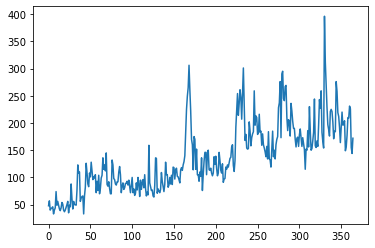

In [39]:
subs.plot()

In [43]:
# movies.value_counts().head(20).plot(kind='pie')
# movies.value_counts().head(20).plot(kind='bar')

### Some Important Series Methods

In [ ]:
# astype
# between
# clip
# drop_duplicates
# isnull
# dropna
# fillna
# isin
# apply
# copy

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
# astype
import sys
sys.getsizeof(vk)
vk.astype('int16')
sys.getsizeof(vk)

3456

In [ ]:
# between -- will a boolean series.
# to count the number of innings in which VK scored between 51 and 99.(both 51 and 99 are included.)
vk[vk.between(51,99)].size

# .isin--
        #matches where VK got out at 49 or 99.
vk[vk.isin([49,99])]  # gets True for rows where values are either 49,99.
vk[(vk == 49) | (vk == 99)] # alt syntex


In [ ]:
# clip-- to clip values between certain range.
subs

subs.clip(100,200)
# 100 se kam waali will be raised to 100, and 200 se jayda waali values will be lowered to 200. so size will remain same.

0       48
1       57
2       40
3       43
4       44
      ... 
360    231
361    226
362    155
363    144
364    172
Name: Subscribers gained, Length: 365, dtype: int64

In [ ]:
# drop_duplicates
temp = pd.Series([1,1,2,2,3,3,4,4])
temp
temp.drop_duplicates(keep='last')
# will drop repeated/duplicate values.
# by default keep is set as 'first'

movies.drop_duplicates().size


# .duplicated-- gives a boolean series & tells if duplicate values are there. (True for duplicate values.)
temp.duplicated()   # another function is sorted--it provides a list of sorted items. all the nan after first one are considered as duplicate hence True for them.
temp.duplicated().sum()   # will provide count of duplicate values.
vk.duplicated().sum()

In [ ]:
temp = pd.Series([1,2,3,np.nan,5,6,np.nan,8,np.nan,10])
temp

0     1.0
1     2.0
2     3.0
3     NaN
4     5.0
5     6.0
6     NaN
7     8.0
8     NaN
9    10.0
dtype: float64

In [ ]:
temp.size #op- 10
temp.count()  #op- 7  #null values are not counted.

# isnull
temp.isnull().sum()

# dropna
temp.dropna()

# fillna
temp.fillna(temp.mean())

10

In [ ]:
# apply-- help in applying custom logic.
movies.head()
# to get name of first actor for each movie in upper case.
movies.apply(lambda x:x.split()[0].upper())

subs.head()
# good day if subs gained > avg(yealy subs) else 'bad day'
subs.apply(lambda x:'good day' if x > subs.mean() else 'bad day')

movie
Uri: The Surgical Strike                   Vicky Kaushal
Battalion 609                                Vicky Ahuja
The Accidental Prime Minister (film)         Anupam Kher
Why Cheat India                            Emraan Hashmi
Evening Shadows                         Mona Ambegaonkar
Name: lead, dtype: object

In [ ]:
subs.mean()

In [ ]:
#  Views & copy

In [ ]:
vk

In [ ]:
vk1 = vk.head()

# 'new' is a view of original series and if any modification done in 'new' then it will reflect in original series.

In [ ]:

vk1[1] = 1
print(vk1)
vk.head()

match_no
1     1
2    23
3    13
4    12
5     1
Name: runs, dtype: int64


match_no
1     1
2    23
3    13
4    12
5     1
Name: runs, dtype: int64

In [ ]:
vk1 = vk.head().copy()
# if a new series vk1 is created using .copy then any modification done in vk1 will not make change in vk.

In [ ]:
vk1[1] = 80

In [ ]:
vk1


match_no
1    80
2    23
3    13
4    12
5     1
Name: runs, dtype: int64

In [ ]:
vk.head()

match_no
1     1
2    23
3    13
4    12
5     1
Name: runs, dtype: int64

In [ ]:
fruits = ['mango', 'kiwi', 'strawberry', 'guava', 'pineapple', 'mandarin orange']

numbers = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 13, 17, 19, 23, 256, -8, -4, -2, 5, -9]

## L17 Data Frame

In [ ]:
import numpy as np
import pandas as pd

### Creating DataFrame

In [ ]:
movies = pd.read_excel(file_path, sheet_name='d17_movies_imdb')
ipl = pd.read_excel(file_path, sheet_name='ipl_matches')
batsman = pd.read_excel(file_path, sheet_name='d17_batsman_runs')

In [47]:
# using lists
student_data = [
    [100,80,10],
    [90,70,7],
    [120,100,14],
    [80,50,2]
]

pd.DataFrame(student_data,columns=['iq','marks','package'])

# using dicts

student_dict = {
    'name':['nitish','ankit','rupesh','rishabh','amit','ankita'],
    'iq':[100,90,120,80,0,0],
    'marks':[80,70,100,50,0,0],
    'package':[10,7,14,2,0,0]
}

students = pd.DataFrame(student_dict)
students.set_index('name',inplace=True)
students

,iq,marks,package
name,,,
nitish,100,80,10
ankit,90,70,7
rupesh,120,100,14
rishabh,80,50,2
amit,0,0,0
ankita,0,0,0


In [46]:
movies.head()
ipl.head()
batsman.head()

,batter,batsman_run
0,A Ashish Reddy,280
1,A Badoni,161
2,A Chandila,4
3,A Chopra,53
4,A Choudhary,25


### DataFrame Attributes and Methods

**df.size** is a property in the pandas library that returns the number of elements in a DataFrame. If the DataFrame is a Series, it returns the number of rows. Otherwise, it returns the number of rows times the number of columns in the DataFrame

In [ ]:
movies.size
# shape
print(movies.shape)
print(ipl.shape)  # o/p is tuple so it can be indexed.
print(type(ipl.shape))

# dtypes
movies.dtypes
ipl.dtypes
# index
movies.index #-->RangeIndex(start=0, stop=950, step=1)
ipl.index
# columns
movies.columns
# values
students.values #-->an array of nested list
  # with each row value inside the list as item of outer list.
# head and tail
movies.head(2)
ipl.tail(2)
ipl.sample(5)
# info
movies.info()
# describe
movies.describe()

In [48]:
# isnull
movies.isnull().sum() #> gives null count for each column.
# duplicated-- Return boolean Series denoting duplicate rows.
# returns a boolean with True for duplicate row.
movies.duplicated().sum()
students.duplicated().sum()
#rename
students.rename(columns={'marks':'percent','package':'lpa'},inplace=True)


### Math Methods

In [49]:
students

,iq,percent,lpa
name,,,
nitish,100,80,10
ankit,90,70,7
rupesh,120,100,14
rishabh,80,50,2
amit,0,0,0
ankita,0,0,0


In [52]:
# sum -> axis argument
students.sum(axis=0)
students.mean(axis=1)
students.var() # by default axis=0 is defined.
students.sum()


iq         390
percent    300
lpa         33
dtype: int64

### Selecting cols from a DataFrame

In [ ]:
# single cols
movies['title_x']
# multiple cols
movies[['year_of_release','actors','title_x']]
ipl[['Team1','Team2','WinningTeam']]


0                   Uri: The Surgical Strike
1                              Battalion 609
2       The Accidental Prime Minister (film)
3                            Why Cheat India
4                            Evening Shadows
                        ...                 
1624                   Tera Mera Saath Rahen
1625                    Yeh Zindagi Ka Safar
1626                         Sabse Bada Sukh
1627                                   Daaka
1628                                Humsafar
Name: title_x, Length: 1629, dtype: object

### Selecting rows from a DataFrame

- **iloc** - searches using index positions
- **loc** - searches using index labels

In [ ]:
# single row
movies.iloc[5]
# multiple row
movies.iloc[:5]
# fancy indexing
movies.iloc[[0,4,5]]
students.loc['nitish']
students.loc['nitish':'rishabh':2]
students.loc[['nitish','ankita','rupesh']]
students.iloc[[0,3,4]]


In [53]:
students

,iq,percent,lpa
name,,,
nitish,100,80,10
ankit,90,70,7
rupesh,120,100,14
rishabh,80,50,2
amit,0,0,0
ankita,0,0,0


### Selecting both rows and cols

In [ ]:
students.loc['nitish':'rupesh','iq':'percent']

movies.iloc[0:3,0:3]
#To get a subset of both rows and columns, use the .loc[] method with appropriate labels:
movies.loc[0:2,'title_x':'poster_path']

movies.iloc[0:2,0:2]
movies.loc[0:2,'title_x':'poster_path']


,title_x,imdb_id,poster_path
0,Uri: The Surgical Strike,tt8291224,https://upload.wikimedia.org/wikipedia/en/thum...
1,Battalion 609,tt9472208,NaN
2,The Accidental Prime Minister (film),tt6986710,https://upload.wikimedia.org/wikipedia/en/thum...


### Filtering a DataFrame

In [ ]:
ipl.head(2)
# find all the final winners
print(ipl.columns)
ipl['MatchNumber'].value_counts().sort_index(ascending = False).head(10)

#pip install tabulate
# find the winning team of each session
mask = ipl['MatchNumber'] == 'Final'
new_df = ipl[mask]
new_df[['Season','WinningTeam']]
# fullcode--
ipl[ipl['MatchNumber'] == 'Final'][['Season','WinningTeam']]

# how many super over finishes have occured
ipl[ipl['SuperOver'] == 'Y'].shape[0]

# how many matches has csk won in kolkata
ipl[(ipl['City'] == 'Kolkata') & (ipl['WinningTeam'] == 'Chennai Super Kings')].shape[0]

# toss winner is match winner in percentage
(ipl[ipl['TossWinner'] == ipl['WinningTeam']].shape[0]/ipl.shape[0])*100

# movies with rating higher than 8 and votes>10000
movies[(movies['imdb_rating'] > 8.5) & (movies['imdb_votes'] > 10000)].shape[0]

# Action movies with rating higher than 7.5
# mask1 = movies['genres'].str.split('|').apply(lambda x:'Action' in x)
mask1 = movies['genres'].str.contains('Action')
mask2 = movies['imdb_rating'] > 7.5
movies[mask1 & mask2]

# write a function that can return the track record of 2 teams against each other



,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
0,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,N,Gujarat Titans,Wickets,7.0,NaN,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon
1,1312199,Ahmedabad,2022-05-27,2022,Qualifier 2,Royal Challengers Bangalore,Rajasthan Royals,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,field,N,Rajasthan Royals,Wickets,7.0,NaN,JC Buttler,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...",CB Gaffaney,Nitin Menon


### Adding new cols

In [ ]:
# completely new
movies['Country'] = 'India'
movies.head()

movies['lead actor'] = movies['actors'].str.split('|').apply(lambda x:x[0])
movies.head()
# ##there is error in the o/p as there are missing values in the actors column and pandas treat the missing values as float.

In [ ]:
movies.info()

### Important DataFrame Functions

In [ ]:
# astype
ipl.info()
ipl['ID'] = ipl['ID'].astype('int32')
# ipl['Season'] = ipl['Season'].astype('category')
ipl['Team1'] = ipl['Team1'].astype('category')
ipl['Team2'] = ipl['Team2'].astype('category')

In [ ]:
# ipl['Season'] = ipl['Season'].astype('category')
ipl['Team1'] = ipl['Team1'].astype('category')
ipl['Team2'] = ipl['Team2'].astype('category')

In [ ]:
# value_counts

In [ ]:
# find which player has won most potm -> in finals and qualifiers

In [ ]:
# Toss decision plot

In [ ]:
# how many matches each team has played

In [ ]:
# sort_values -> ascending -> na_position -> inplace -> multiple cols

## L18-imp methods

### More Important Functions

In [ ]:
# value_counts
# sort_values
# rank
# sort index
# set index
# rename index -> rename
# reset index
# unique & nunique
# isnull/notnull/hasnans
# dropna
# fillna
# drop_duplicates
# drop
# apply
# isin
# corr
# nlargest -> nsmallest
# insert
# copy

In [ ]:
import numpy as np
import pandas as pd

In [ ]:

a = pd.Series([1,1,1,2,2,3])
marks = pd.DataFrame([
    [100,80,10],
    [90,70,7],
    [120,100,14],
    [80,70,14],
    [80,70,14]
],columns=['iq','marks','package'])
marks


1    3
2    2
3    1
dtype: int64

In [60]:
ipl.head(2)

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
0,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,N,Gujarat Titans,Wickets,7.0,NaN,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon
1,1312199,Ahmedabad,2022-05-27,2022,Qualifier 2,Royal Challengers Bangalore,Rajasthan Royals,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,field,N,Rajasthan Royals,Wickets,7.0,NaN,JC Buttler,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...",CB Gaffaney,Nitin Menon


In [ ]:
# value_counts(series and dataframe)
marks.value_counts()    # gives value count of the complete row. so it is more imp when used with series.


In [ ]:
# Q--ipl finals and qualifiers mein maxm time player of the match winner.

# ipl['MatchNumber'].unique()
# ipl['MatchNumber'].values
ipl['MatchNumber'].value_counts().sort_index(ascending=False).head(8)
finals=ipl[~ipl['MatchNumber'].str.isdigit()]
finals['Player_of_Match'].value_counts().index[0]

# how many matches each team has played
(ipl['Team2'].value_counts() + ipl['Team1'].value_counts()).sort_values(ascending=False)


Semi Final            6
Qualifier 2          10
Qualifier 1          10
Qualifier             4
Final                15
Eliminator            9
Elimination Final     3
9                    15
Name: MatchNumber, dtype: int64

In [ ]:
'''
Pandas str.isdigit() method is used to check
if all characters in each string in series are digits.
Whitespace or any other character occurrence in the string would return false.
If the number is in decimal, then also false will be returned
since this is a string method and ‘.’ is a special character and not a decimal in strings.'''

import pandas as pd
s = pd.Series(['12', '3.14', 'abc', ' ', '²', '⅕'])
print(s.str.isdigit())

# Output ---------
# 0     True
# 1    False
# 2    False
# 3    False
# 4     True
# 5    False
# dtype: bool

### ------------------------------------------------------------

In [ ]:
#  USING sort_values(series and dataframe) -> ascending -> na_position -> inplace -> multiple cols

x = pd.Series([12,14,1,56,89])
x.sort_values(ascending=False)

movies.sort_values('title_x',ascending=False).head(3)
movies.sort_values(['year_of_release','title_x'],ascending=[True,False])

In [ ]:
students = pd.DataFrame(
    {
        'name':['nitish','ankit','rupesh',np.nan,'mrityunjay',np.nan,'rishabh',np.nan,'aditya',np.nan],
        'college':['bit','iit','vit',np.nan,np.nan,'vlsi','ssit',np.nan,np.nan,'git'],
        'branch':['eee','it','cse',np.nan,'me','ce','civ','cse','bio',np.nan],
        'cgpa':[6.66,8.25,6.41,np.nan,5.6,9.0,7.4,10,7.4,np.nan],
        'package':[4,5,6,np.nan,6,7,8,9,np.nan,np.nan]

    }
)

students
# NaN are missing values.

In [ ]:
students.sort_values('name')
students.sort_values('name',na_position='first',ascending=False,inplace=True)
students
# by defalut all NaN values are placed in last in sorting.

In [ ]:
batsman['batsman_run'].sort_values(ascending=False)

569    6634
462    6244
130    5883
430    5881
493    5536
       ... 
102       0
65        0
467       0
570       0
468       0
Name: batsman_run, Length: 605, dtype: int64

In [ ]:
batsman['batting_rank'] = batsman['batsman_run'].rank(ascending=False)
batsman.sort_values('batting_rank')

,batter,batsman_run,batting_rank
569,V Kohli,6634,1.0
462,S Dhawan,6244,2.0
130,DA Warner,5883,3.0
430,RG Sharma,5881,4.0
493,SK Raina,5536,5.0
...,...,...,...
512,SS Cottrell,0,594.0
466,S Kaushik,0,594.0
203,IC Pandey,0,594.0
467,S Ladda,0,594.0


In [ ]:
# sort_index(series and dataframe)

In [ ]:
marks = {
    'maths':67,
    'english':57,
    'science':89,
    'hindi':100
}

marks_series = pd.Series(marks)
marks_series
# -------------------------------------------
marks_series.sort_index(ascending=False)


maths       67
english     57
science     89
hindi      100
dtype: int64

In [ ]:
# set_index(dataframe) -> inplace
batsman.set_index('batter',inplace=True)
# reset_index(series + dataframe) -> drop parameter
batsman.reset_index(inplace=True)
# how to replace existing index without loosing
batsman.reset_index().set_index('batting_rank')

# series to dataframe using reset_index
marks_series.reset_index()

In [ ]:
# rename(dataframe) -> index,columns

# to rename column names
movies.rename(columns={'imdb_id':'imdb','poster_path':'link'},inplace=True)
#  to rename index
movies.rename(index={'Uri: The Surgical Strike':'Uri','Battalion 609':'Battalion'})

In [ ]:
# unique(series)-- gives all the unique values.
temp = pd.Series([1,1,2,2,3,3,4,4,5,5,np.nan,np.nan])

# nunique(series + dataframe) -> does not count nan -> dropna parameter
ipl['Season'].nunique()
len(ipl['Season'].unique())


print(temp)
temp.unique()
temp.nunique()  #provide num of unique values doesn't count NaN
len(temp.unique()) #count unique


#### null and NaN
In pandas, nan, null, and none are three ways of representing missing or invalid data. However, they are not exactly the same, and there are some differences in how they behave.

- nan is a special floating-point value that stands for not-a-number. It is part of the IEEE floating-point standard and can be used in arithmetic operations, but the result will always be nan.
- Pandas uses nan internally to handle missing values in numeric columns, and converts None to nan automatically.
-null is a generic term that means the absence of data. It is not a specific value or type in Python, but it is often used interchangeably with None or nan to indicate missing data.
-- Pandas provides methods like isna() and notna() to check for null values in a Series or DataFrame.
- None is a Python object of type NoneType. It represents the absence of a value or the concept of nothing. It cannot be used in arithmetic operations, and it will cause an error if you try to aggregate over a column that contains None values.
-- Pandas converts None to nan in numeric columns, but keeps it as None in object columns.
Here is a table that summarizes the main differences between nan, null, and none in pandas:

Table

Term-->	Type-->	Meaning-->	Arithmetic-->	Aggregation-->	Detection
- nan --	float--	Not a number--	Propagates--	Ignored	isna()
- null--	N/A--	Absence of data--	N/A--	N/A--	isna() or notna()
- None--	NoneType--	Nothing--	Error--	Error--	isna() or == None




In [ ]:
# isnull(series + dataframe)
students[students['name'].isnull()]
# notnull(series + dataframe)
students['name'][students['name'].notnull()]
# hasnans(series)->(boolean)
students['name'].hasnans

  # on a df
students.isnull()


,name,college,branch,cgpa,package
3,NaN,NaN,NaN,NaN,NaN
5,NaN,vlsi,ce,9.0,7.0
7,NaN,NaN,cse,10.0,9.0
9,NaN,git,NaN,NaN,NaN


In [ ]:
# dropna(series + dataframe) -> how parameter -> works like or
students['name'].dropna()
students.dropna(how='any')
students.dropna(how='all')

students.dropna(subset=['name']) # will remove rows based on na values of name column
students.dropna(subset=['name','college']) #name or college mein missing value wali rows ko drop kardega.
students.dropna(inplace=True)


# fillna(series + dataframe)
students['name'].fillna('unknown') # will replace values with the value 'unknown'
students['package'].fillna(students['package'].mean())

students['name'].fillna(method='bfill')
  # forward fill(ffill) will fill the na value with the previous value.

# drop_duplicates(series + dataframe) -> works like and -> duplicated()
temp = pd.Series([1,1,1,2,3,3,4,4])
temp.drop_duplicates()
marks.drop_duplicates(keep='last')
students.drop_duplicates()

# drop(series + dataframe)
temp = pd.Series([10,2,3,16,45,78,10])
temp
temp.drop(index=[0,6])
students.drop(columns=['branch','cgpa'],inplace=True)
    # will drop branch and cgpa column
students.set_index('name').drop(index=['nitish','aditya'])



In [ ]:
# find the last match played by virat kohli in Delhi
ipl['all_players'] = ipl['Team1Players'] + ipl['Team2Players']
ipl.head()

In [ ]:
def did_kohli_play(players_list):
  return 'V Kohli' in players_list

In [ ]:
ipl['did_kohli_play'] = ipl['all_players'].apply(did_kohli_play)
ipl[(ipl['City'] == 'Delhi') & (ipl['did_kohli_play'] == True)].drop_duplicates(subset=['City','did_kohli_play'],keep='first')

In [ ]:
# apply(series + dataframe)
temp = pd.Series([10,20,30,40,50])
def sigmoid(value):
  return 1/(1+np.exp(-value))
temp.apply(sigmoid)


0    10
1    20
2    30
3    40
4    50
dtype: int64

In [ ]:
points_df = pd.DataFrame(
    {
        '1st_point':[(3,4),(-6,5),(0,0),(-10,1),(4,5)],
        '2nd_point':[(-3,4),(0,0),(2,2),(10,10),(1,1)]
    }
)
points_df
# fxn to cal euclidean distance
def euc(df):
    a=df['1st_point']
    print(type(a))
    b=df['2nd_point']
    print(b)

    return ((a[0]-b[0])**2 + (a[1]-b[1])**2)**0.5
points_df.apply(euc, axis=1)


,1st_point,2nd_point
0,"(3, 4)","(-3, 4)"
1,"(-6, 5)","(0, 0)"
2,"(0, 0)","(2, 2)"
3,"(-10, 1)","(10, 10)"
4,"(4, 5)","(1, 1)"


In [ ]:
a=points_df['1st_point']
a[0]
def euclidean(row):
  pt_A = row['1st_point']
  pt_B = row['2nd_point']

  return ((pt_A[0] - pt_B[0])**2 + (pt_A[1] - pt_B[1])**2)**0.5

points_df['distance'] = points_df.apply(euclidean,axis=1)
points_df

(3, 4)

In [ ]:
# isin(series)

In [ ]:
# corr

In [ ]:
# nlargest and nsmallest(series and dataframe)

In [ ]:
# insert(dataframe)


In [ ]:
# copy(series + dataframe)

## L-19 Groupby objects

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
movies = pd.read_excel(file_path, sheet_name='d17_movies_imdb')


In [ ]:
genres = movies.groupby('Genre')

In [ ]:
# Applying builtin aggregation fuctions on groupby objects
genres.std()

In [ ]:
# find the top 3 genres by total earning
movies.groupby('Genre').sum()['Gross'].sort_values(ascending=False).head(3)
movies.groupby('Genre')['Gross'].sum().sort_values(ascending=False).head(3)

# find the genre with highest avg IMDB rating
movies.groupby('Genre')['IMDB_Rating'].mean().sort_values(ascending=False).head(1)

# find director with most popularity
movies.groupby('Director')['No_of_Votes'].sum().sort_values(ascending=False).head(1)

# find the highest rated movie of each genre
# find the highest imdb rating of each genre.
movies.groupby('Genre')['IMDB_Rating'].max()

# find number of movies done by each actor
# movies['Star1'].value_counts()
movies.groupby('Star1')['Series_Title'].count().sort_values(ascending=False)
# movies.groupby('Star1').size().sort_values(ascending=False)


In [ ]:
# GroupBy Attributes and Methods
# find total number of groups -> len
# find no of items in each group -> size
# first()/last() -> nth item
# get_group -> vs filtering
# groups
# describe
# sample
# nunique

In [ ]:
# len()
# .size()
# .get_group('name')
# .groups.keys()
# .sample(2, replace=True)
# .first()
# .last()
# .nth(6)

len(movies.groupby('Genre'))    #gives total no of groups.
movies['Genre'].nunique()

movies.groupby('Genre').size()
movies['Genre'].value_counts()

movies['Genre'].unique()    # will give all the unique genres.
genres.groups.keys() # to get all the group names.


genres = movies.groupby('Genre')
# genres.first()
# genres.last()
genres.nth(6)

# movies[movies['Genre'] == 'Fantasy']
genres.get_group('Fantasy')

genres.groups
genres.groups.keys() # to get all the group names.

genres.describe()

genres.sample(2,replace=True)

genres['Series_Title'].nunique()


In [ ]:
# agg method

    # passing dict
genres.agg(
    {
        'Runtime':'mean',
        'IMDB_Rating':'mean',
        'No_of_Votes':'sum',
        'Gross':'sum',
        'Metascore':'min'
    }
)
    # passing list
genres.agg(['min','mean'])

# Adding both the syntax
genres.agg(
    {
        'Runtime':['min','mean'],
        'IMDB_Rating':'mean',
        'No_of_Votes':['sum','max'],
        'Gross':'sum',
        'Metascore':'min'
    }
)


### Looping & Split-Apply-Combine

In [ ]:
for group, data in genres:
  print(group)
  # print(data)

# looping on groups
# Q)- Find the max imdb rated movie of each group.
df = pd.DataFrame(columns=movies.columns)
for group,data in genres:
# df=df.append(data)
  df = df.append(data[data['IMDB_Rating'] == data['IMDB_Rating'].max()])
df

# split (apply) combine
# apply -> builtin function
genres.apply(min)

# find number of movies starting with A for each group
def foo(group):
  return group['Series_Title'].str.startswith('A').sum()
genres.apply(foo)

## find ranking of each movie in the group according to IMDB score#
def rankings(group):
  group['rnk'] = group['IMDB_Rating'].rank(ascending=False)
  return group
genres.apply(rankings)

# find ranking of each movie in the group according to IMDB score
def rank_movie(group):
  group['genre_rank'] = group['IMDB_Rating'].rank(ascending=False)
  return group
genres.apply(rank_movie)

# find normalized IMDB rating group wise
def normal(group):
  group['norm_rating'] = (group['IMDB_Rating'] - group['IMDB_Rating'].min())/(group['IMDB_Rating'].max() - group['IMDB_Rating'].min())
  return group
genres.apply(normal)


In [ ]:
movies.columns

Index(['Series_Title', 'Released_Year', 'Runtime', 'Genre', 'IMDB_Rating',
       'Director', 'Star1', 'No_of_Votes', 'Gross', 'Metascore'],
      dtype='object')

### groupby on multiple cols

In [ ]:
# groupby on multiple cols
duo = movies.groupby(['Director','Star1'])
duo
  # size
duo.size()
  # get_group
duo.get_group(('Aamir Khan','Amole Gupte'))

# find the most earning actor->director combo
duo['Gross'].sum().sort_values(ascending=False).head(1)

# find the best(in-terms of metascore(avg)) actor->genre combo
movies.groupby(['Star1','Genre'])['Metascore'].mean().reset_index().sort_values('Metascore',ascending=False).head(1)

# agg on multiple groupby
duo.agg(['max','mean'])


,Series_Title,Released_Year,Runtime,Genre,IMDB_Rating,Director,Star1,No_of_Votes,Gross,Metascore
65,Taare Zameen Par,2007,165,Drama,8.4,Aamir Khan,Amole Gupte,168895,1223869.0,NaN


### Excercise

In [ ]:
ipl = pd.read_csv('/content/ipl_balls.csv')
ipl.head()

In [ ]:
# find the top 10 batsman in terms of runs
ipl.groupby('batsman')['batsman_runs'].sum().sort_values(ascending=False).head(10)

In [ ]:
# find the batsman with max no of sixes
six = ipl[ipl['batsman_runs'] == 6]

six.groupby('batsman')['batsman'].count().sort_values(ascending=False).head(1).index[0]

In [ ]:
# find batsman with most number of 4's and 6's in last 5 overs
temp_df = ipl[ipl['over'] > 15]
temp_df = temp_df[(temp_df['batsman_runs'] == 4) | (temp_df['batsman_runs'] == 6)]
temp_df.groupby('batsman')['batsman'].count().sort_values(ascending=False).head(1).index[0]

In [ ]:
# find V Kohli's record against all teams
temp_df = ipl[ipl['batsman'] == 'V Kohli']

temp_df.groupby('bowling_team')['batsman_runs'].sum().reset_index()

In [ ]:
# Create a function that can return the highest score of any batsman
temp_df = ipl[ipl['batsman'] == 'V Kohli']
temp_df.groupby('match_id')['batsman_runs'].sum().sort_values(ascending=False).head(1).values[0]

In [ ]:
def highest(batsman):
  temp_df = ipl[ipl['batsman'] == batsman]
  return temp_df.groupby('match_id')['batsman_runs'].sum().sort_values(ascending=False).head(1).values[0]


In [ ]:
highest('DA Warner')

## L19-SUmmary

In [ ]:
genres=movies.groupby('Genre')

len(genres)
genres.groups.keys()
# -------------------------------------
genres.size()
genres['Genre'].count()
genres['Series_Title'].nunique()
# -------------------------------------
genres.get_group('Action')

Genre
Action       172
Adventure     72
Animation     82
Biography     88
Comedy       155
Crime        107
Drama        289
Family         2
Fantasy        2
Film-Noir      3
Horror        11
Mystery       12
Thriller       1
Western        4
Name: Genre, dtype: int64

In [ ]:
movies['Genre'].nunique()
movies['Genre'].unique()
# -------------------------------------
movies['Genre'].value_counts()
# -------------------------------------

movies[movies['Genre']=='Action']

## L20-PANDAS_merging

In [7]:
import pandas as pd
import numpy as np

In [ ]:
courses = pd.read_excel(file_path, sheet_name='d20_courses')
students = pd.read_excel(file_path, sheet_name='d20_students')
nov = pd.read_excel(file_path, sheet_name='d20_month1')
dec = pd.read_excel(file_path, sheet_name='d20_month2')
matches = pd.read_excel(file_path, sheet_name='d20_ipl_matches')
delivery = pd.read_excel(file_path, sheet_name='ipl_balls')

In [ ]:
courses.head()
dec.head()


,course_id,course_name,price
0,1,python,2499
1,2,sql,3499
2,3,data analysis,4999
3,4,machine learning,9999
4,5,tableau,2499


In [ ]:
# pd.concat
# df.concat
# ignore_index
# df.append
# mullitindex -> fetch using iloc
# concat dataframes horizontally

In [ ]:
regs = pd.concat([nov,dec],ignore_index=True)   # ignore_index--> creates new index ignoring the existing indices
nov.append(dec,ignore_index=True).head()    # old syntex; now pd.concat is used.

regs.head()

# Multiindex DataFrame
multi = pd.concat([nov,dec],keys=['Nov','Dec']) # it will create a multiindex df.
multi.loc[('Dec',4)]    #here we need to provide both indexes in a tuple to access the row.

#to join the side-by-side
pd.concat([nov,dec],axis=1) #. list of the table to be joined is supplied as more than 2 tables can be joined.


,student_id,course_id
0,23,1
1,15,5
2,18,6
3,23,4
4,16,9


In [ ]:
# 2 syntax for merge(join in sql)
students.merge(regs)
pd.merge(students,regs, how='inner', on='student_id')

In [ ]:
# inner join
pd.merge(students, regs, how='inner',on='student_id').head()
   # also default value of how is 'inner' if not provided.
# regs.merge(students,how='inner',on='student_id').sort_values('student_id')

# left join
courses.merge(regs,how='left',on='course_id')

In [ ]:
# right join
#------------------------------------------------------------------------
    #updateing students df to showcase right join
temp_df = pd.DataFrame({
    'student_id':[26,27,28],
    'name':['Nitish','Ankit','Rahul'],
    'partner':[28,26,17]
})
students = pd.concat([students,temp_df],ignore_index=True)
students.tail()
#-------------------------------------------------------------------------
students.merge(regs,how='right',on='student_id')

# outer join
students.merge(regs,how='outer',on='student_id').tail(10)

#### Questions

In [ ]:
# 1. find total revenue generated
total = regs.merge(courses,how='inner',on='course_id')['price'].sum()
total

# 2. find month by month revenue
temp_df = pd.concat([nov,dec],keys=['Nov','Dec']).reset_index()
temp_df
temp_df.merge(courses,on='course_id').groupby('level_0')['price'].sum()

# 3. Print the registration table
# cols -> | name of the registered student | course | price |
regs.merge(students,on='student_id').merge(courses,on='course_id')[['name','course_name','price']]

# 4. Plot bar chart for revenue/course
regs.merge(courses,on='course_id').groupby('course_name')['price'].sum().plot(kind='bar')

# 5. find students who enrolled in both the months
common_student_id = np.intersect1d(nov['student_id'],dec['student_id'])
common_student_id
students[students['student_id'].isin(common_student_id)]

# 6. find course that got no enrollment
# courses['course_id']
# regs['course_id']
course_id_list = np.setdiff1d(courses['course_id'],regs['course_id'])
courses[courses['course_id'].isin(course_id_list)]

# 7. find students who did not enroll into any courses
student_id_list = np.setdiff1d(students['student_id'],regs['student_id'])
students[students['student_id'].isin(student_id_list)]

# 8. Print student name -> partner name for all enrolled students
# self join
students.merge(students,how='inner',left_on='partner',right_on='student_id')[['name_x','name_y']]

# 9. find top 3 students who did most number enrollments
regs.merge(students,on='student_id').groupby(['student_id','name'])['name'].count().sort_values(ascending=False).head(3)

# 10. find top 3 students who spent most amount of money on courses
regs.merge(students,on='student_id').merge(courses,on='course_id').groupby(['student_id','name'])['price'].sum().sort_values(ascending=False).head(3)




154247

In [ ]:
# IPL Problems

# find orange cap holder of all the seasons--who has scored most runs

In [ ]:
matches.head()
delivery.head()

In [ ]:
# find top 3 studiums with highest sixes/match ratio
temp_df = delivery.merge(matches,left_on='match_id',right_on='id')
six_df = temp_df[temp_df['batsman_runs'] == 6]

num_sixes = six_df.groupby('venue')['venue'].count()
num_sixes
num_matches = matches['venue'].value_counts()

(num_sixes/num_matches).sort_values(ascending=False).head(10)


In [ ]:
temp_df.groupby(['season','batsman'])['batsman_runs'].sum().reset_index().sort_values('batsman_runs',ascending=False).drop_duplicates(subset=['season'],keep='first').sort_values('season')

,season,batsman,batsman_runs
115,2008,SE Marsh,616
229,2009,ML Hayden,572
446,2010,SR Tendulkar,618
502,2011,CH Gayle,608
684,2012,CH Gayle,733
910,2013,MEK Hussey,733
1088,2014,RV Uthappa,660
1148,2015,DA Warner,562
1383,2016,V Kohli,973
1422,2017,DA Warner,641


In [ ]:
temp_df.groupby(['season','batsman'])['batsman_runs'].sum().reset_index().sort_values('batsman_runs',ascending=False)

,season,batsman,batsman_runs
1383,2016,V Kohli,973
1278,2016,DA Warner,848
910,2013,MEK Hussey,733
684,2012,CH Gayle,733
852,2013,CH Gayle,720
...,...,...,...
1467,2017,MM Patel,0
658,2012,AC Blizzard,0
475,2011,AB Dinda,0
1394,2017,AD Nath,0


## L_20_PANDAS_Z

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
print(courses.columns)
print(students.columns)
print(f'nov data {nov.columns}')
print(courses.columns)


Index(['course_id', 'course_name', 'price'], dtype='object')
Index(['student_id', 'name', 'partner'], dtype='object')
nov data Index(['student_id', 'course_id'], dtype='object')
Index(['course_id', 'course_name', 'price'], dtype='object')


In [ ]:
regs=pd.concat([nov,dec],keys=['Nov','Dec'])
regs

In [ ]:
print(courses.columns)
print(students.columns)
print(f'REGSDATA:: {regs.columns}')
print(courses.columns)


Index(['course_id', 'course_name', 'price'], dtype='object')
Index(['student_id', 'name', 'partner'], dtype='object')
REGSDATA:: Index(['student_id', 'course_id'], dtype='object')
Index(['course_id', 'course_name', 'price'], dtype='object')


In [ ]:
pd.merge(regs,courses, how='inner',on='course_id')['price'].sum()

154247

In [ ]:
print(courses.columns)
print(students.columns)
print(f' {regs.columns}')
print(courses.columns)


Index(['course_id', 'course_name', 'price'], dtype='object')
Index(['student_id', 'name', 'partner'], dtype='object')
 Index(['student_id', 'course_id'], dtype='object')
Index(['course_id', 'course_name', 'price'], dtype='object')


In [ ]:
temp_df=pd.concat([nov,dec],keys=['Nov','Dec']).reset_index()
temp_df

In [ ]:
pd.merge(regs,courses,how='inner',on='course_id')

In [ ]:
pd.merge(temp_df,courses,on='course_id').groupby('level_0')['price'].sum()

level_0
Dec    65072
Nov    89175
Name: price, dtype: int64

In [ ]:
print(courses.columns)
print(students.columns)
print(f' {regs.columns}')
print(courses.columns)


Index(['course_id', 'course_name', 'price'], dtype='object')
Index(['student_id', 'name', 'partner'], dtype='object')
 Index(['student_id', 'course_id'], dtype='object')
Index(['course_id', 'course_name', 'price'], dtype='object')


In [ ]:
enrolled_rev=pd.merge(regs,courses,on='course_id').merge(students,on='student_id')[['name','course_name','price']]

In [ ]:
print(courses.columns)
print(students.columns)
print(f' {regs.columns}')
print(courses.columns)


Index(['course_id', 'course_name', 'price'], dtype='object')
Index(['student_id', 'name', 'partner'], dtype='object')
 Index(['student_id', 'course_id'], dtype='object')
Index(['course_id', 'course_name', 'price'], dtype='object')


<AxesSubplot:xlabel='course_name'>

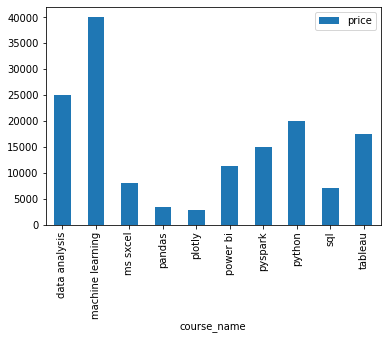

In [ ]:
enrolled_rev.groupby('course_name').sum().plot(kind='bar')

In [ ]:
common_students=pd.merge(nov,dec, on='student_id')['student_id'].unique()
students[students['student_id'].isin(common_students)]

,student_id,name,partner
0,1,Kailash Harjo,23
2,3,Parveen Bhalla,3
6,7,Tarun Thaker,9
10,11,David Mukhopadhyay,20
15,16,Elias Dodiya,25
16,17,Yasmin Palan,7
17,18,Fardeen Mahabir,13
21,22,Yash Sethi,21
22,23,Chhavi Lachman,18


In [ ]:
courses[~courses['course_id'].isin(regs['course_id'])]

,course_id,course_name,price
10,11,Numpy,699
11,12,C++,1299


In [ ]:
regs.columns
students[~students['student_id'].isin(regs['student_id'])]

,student_id,name,partner
3,4,Marlo Dugal,14
4,5,Kusum Bahri,6
5,6,Lakshmi Contractor,10
7,8,Radheshyam Dey,5
8,9,Nitika Chatterjee,4
9,10,Aayushman Sant,8
19,20,Hanuman Hegde,11
25,26,Nitish,28
26,27,Ankit,26
27,28,Rahul,17


In [ ]:
print(courses.columns)
print(students.columns)
print(f' {regs.columns}')
print(courses.columns)


Index(['course_id', 'course_name', 'price'], dtype='object')
Index(['student_id', 'name', 'partner'], dtype='object')
 Index(['student_id', 'course_id'], dtype='object')
Index(['course_id', 'course_name', 'price'], dtype='object')


In [ ]:
pd.merge(regs, students, on='student_id').groupby(['student_id','name'])['student_id'].count().sort_values(ascending=False).head(3)

student_id  name          
23          Chhavi Lachman    6
7           Tarun Thaker      5
1           Kailash Harjo     4
Name: student_id, dtype: int64

In [ ]:
pd.merge(students,regs, on='student_id').merge(courses,on='course_id').groupby(['student_id','name'])['price'].sum().sort_values(ascending=False).head(3)

student_id  name            
23          Chhavi Lachman      22594
14          Pranab Natarajan    15096
19          Qabeel Raman        13498
Name: price, dtype: int64

In [ ]:
# find top 3 studiums with highest sixes/match ratio

sixes_per_venue=delivery[delivery['batsman_runs']==6][['match_id','batsman_runs']].merge(matches[['id','venue']], left_on='match_id',right_on='id').drop(columns=['id']).groupby(['venue'])['match_id'].count()

In [ ]:
match_per_venue=matches.groupby('venue')['venue'].count()
match_per_venue

In [ ]:
(sixes_per_venue/match_per_venue).sort_values(ascending=False).round(0).head(10)

In [ ]:
print(matches.columns)
print(delivery.columns)

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')
Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')


In [ ]:
# find orange cap holder of all the seasons--who has scored most runs
matches[['id', 'season']].merge(delivery[['match_id','batsman','batsman_runs']], left_on='id',right_on='match_id').groupby(['season','batsman'])['batsman_runs'].sum().reset_index().sort_values(['season','batsman_runs'],ascending=False).drop_duplicates(subset=['season'],keep='first').sort_values('season')

,season,batsman,batsman_runs
115,2008,SE Marsh,616
229,2009,ML Hayden,572
446,2010,SR Tendulkar,618
502,2011,CH Gayle,608
684,2012,CH Gayle,733
910,2013,MEK Hussey,733
1088,2014,RV Uthappa,660
1148,2015,DA Warner,562
1383,2016,V Kohli,973
1422,2017,DA Warner,641


## L_21_PANDAS_multiindex_objects

In [1]:
import numpy as np
import pandas as pd

### Series is 1D and DataFrames are 2D objects

- But why?
- And what exactly is index?

In [ ]:
# can we have multiple index? Let's try
index_val = [('cse',2019),('cse',2020),('cse',2021),('cse',2022),('ece',2019),('ece',2020),('ece',2021),('ece',2022)]
a = pd.Series([1,2,3,4,5,6,7,8],index=index_val)
a

(cse, 2019)    1
(cse, 2020)    2
(cse, 2021)    3
(cse, 2022)    4
(ece, 2019)    5
(ece, 2020)    6
(ece, 2021)    7
(ece, 2022)    8
dtype: int64

In [ ]:
# The problem?
a['cse']
  #will throw error as the indexes are coupled together and can only be used collectively.

In [ ]:
'''
The solution -> multiindex series(also known as Hierarchical Indexing)
multiple index levels within a single index
multi-level indexing is also known as hierarchial indexing.
'''

In [ ]:
# how to create multiindex object
# 1. pd.MultiIndex.from_tuples()
index_val = [('cse',2019),('cse',2020),('cse',2021),('cse',2022),('ece',2019),('ece',2020),('ece',2021),('ece',2022)]
multiindex = pd.MultiIndex.from_tuples(index_val)
multiindex

# another way to create multi-index using
# .from_product()=>takes 2D lists as input and it performs a cartesian production b/w the items of the 2D list.
# pd.MultiIndex.from_product()
pd.MultiIndex.from_product([['cse','ece'],[2019,2020,2021,2022]])





MultiIndex([('cse', 2019),
            ('cse', 2020),
            ('cse', 2021),
            ('cse', 2022),
            ('ece', 2019),
            ('ece', 2020),
            ('ece', 2021),
            ('ece', 2022)],
           )

In [ ]:
print(type(multiindex)) # a multi-index object.
multiindex.levels   #-- provides a 2D list containing both indexes
multiindex.levels[1]  #->Int64Index([2019, 2020, 2021, 2022], dtype='int64')


FrozenList([['cse', 'ece'], [2019, 2020, 2021, 2022]])

In [ ]:
# level inside multiindex object

In [ ]:
# creating a series with multiindex object
mi=pd.MultiIndex.from_product([['cse','ece'],[2019,2020,2021,2022]])
s = pd.Series([1,2,3,4,5,6,7,8],index=mi)
s

In [ ]:
# how to fetch items from such a series
s['cse']
s['cse'][2022]
s[('cse',2022)]

4

In [ ]:
# How to tell the dimension of the series--> for this we need to know the num of inputs needed to fetch a value.
# the above series is a 2D as to fetch 4 we provided s[('cse',2022)]
# but a 2D data can be represented via dataframe easily. so convert multi-index series into df there is a function called unstack---> s.unstack()
# it converts the inner-index into column.

In [ ]:
# But why are we using mutiindex series instead of df ????
# '👇👇
# here we are representing higher dim data via lower dim object.
# means we can rep 3D data via df or rep 5D data via df(2D object).


In [ ]:
# unstack
s
temp = s.unstack()
temp

,2019,2020,2021,2022
cse,1,2,3,4
ece,5,6,7,8


In [ ]:
# stack ==> to convert df into multi-index series.
temp.stack()

cse  2019    1
     2020    2
     2021    3
     2022    4
ece  2019    5
     2020    6
     2021    7
     2022    8
dtype: int64

#### multiindex dataframe

In [ ]:
branch_df1 = pd.DataFrame(
    [
        [1,2],
        [3,4],
        [5,6],
        [7,8],
        [9,10],
        [11,12],
        [13,14],
        [15,16],
    ],
    index = multiindex,
    columns = ['avg_package','students']
)

branch_df1

avg_package  students
cse 2019            1         2
    2020            3         4
    2021            5         6
    2022            7         8
ece 2019            9        10
    2020           11        12
    2021           13        14
    2022           15        16

In [ ]:
branch_df1.loc['cse']

,avg_package,students
2019,1,2
2020,3,4
2021,5,6
2022,7,8


In [ ]:
branch_df1['students']  # will provide a multi-index series.

cse  2019     2
     2020     4
     2021     6
     2022     8
ece  2019    10
     2020    12
     2021    14
     2022    16
Name: students, dtype: int64

In [ ]:
# Are columns really different from index?
# pandas internally treats index and columns as same.

# so till now we have created mi-df via row level hierarchy.
# similerly we can create mi-df using column level hierarchy.

In [ ]:
# multiindex df from columns perspective
branch_df2 = pd.DataFrame(
    [
        [1,2,0,0],
        [3,4,0,0],
        [5,6,0,0],
        [7,8,0,0],
    ],
    index = [2019,2020,2021,2022],
    columns = pd.MultiIndex.from_product([['delhi','mumbai'],['avg_package','students']])
)

branch_df2

delhi               mumbai         
     avg_package students avg_package students
2019           1        2           0        0
2020           3        4           0        0
2021           5        6           0        0
2022           7        8           0        0

In [ ]:
branch_df2['delhi']['students']
branch_df2[('delhi','students')]
  #both will give same result

2019    2
2020    4
2021    6
2022    8
Name: students, dtype: int64

In [ ]:
branch_df2.loc[2019]

delhi   avg_package    1
        students       2
mumbai  avg_package    0
        students       0
Name: 2019, dtype: int64

In [ ]:
# Multiindex df in terms of both cols and index

branch_df3 = pd.DataFrame(
    [
        [1,2,0,0],
        [3,4,0,0],
        [5,6,0,0],
        [7,8,0,0],
        [9,10,0,0],
        [11,12,0,0],
        [13,14,0,0],
        [15,16,0,0],
    ],
    index = pd.MultiIndex.from_product([['cse','ece'],[2019,2020,2021,2022]]),

    columns= pd.MultiIndex.from_product([['delhi','mumbai'],['avg_package','students']])
)

branch_df3  #  It is a 4D data rep using a 2D structure.

delhi               mumbai         
         avg_package students avg_package students
cse 2019           1        2           0        0
    2020           3        4           0        0
    2021           5        6           0        0
    2022           7        8           0        0
ece 2019           9       10           0        0
    2020          11       12           0        0
    2021          13       14           0        0
    2022          15       16           0        0

### Stacking and Unstacking

In [ ]:
# UNSTACKING-- it converts row to columns
branch_df1

avg_package  students
cse 2019            1         2
    2020            3         4
    2021            5         6
    2022            7         8
ece 2019            9        10
    2020           11        12
    2021           13        14
    2022           15        16

In [ ]:
branch_df1.unstack()

avg_package                students               
           2019 2020 2021 2022     2019 2020 2021 2022
cse           1    3    5    7        2    4    6    8
ece           9   11   13   15       10   12   14   16

In [ ]:
branch_df1.unstack().unstack()


avg_package  2019  cse     1
                   ece     9
             2020  cse     3
                   ece    11
             2021  cse     5
                   ece    13
             2022  cse     7
                   ece    15
students     2019  cse     2
                   ece    10
             2020  cse     4
                   ece    12
             2021  cse     6
                   ece    14
             2022  cse     8
                   ece    16
dtype: int64

In [ ]:
branch_df1.unstack().unstack().stack() # will throw an error.
# so dataframe ko unstacks kar ke agar series bna diya to fir stack apply nahi hoga.

AttributeError: 'Series' object has no attribute 'stack'

In [ ]:
branch_df1.unstack()

avg_package                students               
           2019 2020 2021 2022     2019 2020 2021 2022
cse           1    3    5    7        2    4    6    8
ece           9   11   13   15       10   12   14   16

In [ ]:
branch_df1.unstack().stack()  #stack converts column into row--i.e. reduce column level multi-indexing. stack don't work on

avg_package  students
cse 2019            1         2
    2020            3         4
    2021            5         6
    2022            7         8
ece 2019            9        10
    2020           11        12
    2021           13        14
    2022           15        16

In [ ]:
branch_df3.stack().stack()

cse  2019  avg_package  delhi      1
                        mumbai     0
           students     delhi      2
                        mumbai     0
     2020  avg_package  delhi      3
                        mumbai     0
           students     delhi      4
                        mumbai     0
     2021  avg_package  delhi      5
                        mumbai     0
           students     delhi      6
                        mumbai     0
     2022  avg_package  delhi      7
                        mumbai     0
           students     delhi      8
                        mumbai     0
ece  2019  avg_package  delhi      9
                        mumbai     0
           students     delhi     10
                        mumbai     0
     2020  avg_package  delhi     11
                        mumbai     0
           students     delhi     12
                        mumbai     0
     2021  avg_package  delhi     13
                        mumbai     0
           students     delhi     14
 

### Working with multiindex dataframes

In [ ]:
# head and tail
branch_df3.head()
# shape
print(f'shape is: {branch_df3.shape}')
print(f'size is: {branch_df3.size}') # give no of cells in the df which is equal to row*col

# info
branch_df3.info()
# duplicated -> isnull
branch_df3.duplicated()     # to know if there is any duplicated row.
branch_df3.isna()
branch_df3.notna()
branch_df3.isnull()

delhi               mumbai         
         avg_package students avg_package students
cse 2019       False    False       False    False
    2020       False    False       False    False
    2021       False    False       False    False
    2022       False    False       False    False
ece 2019       False    False       False    False
    2020       False    False       False    False
    2021       False    False       False    False
    2022       False    False       False    False

In [ ]:
# Extracting rows single
branch_df3

delhi               mumbai         
         avg_package students avg_package students
cse 2019           1        2           0        0
    2020           3        4           0        0
    2021           5        6           0        0
    2022           7        8           0        0
ece 2019           9       10           0        0
    2020          11       12           0        0
    2021          13       14           0        0
    2022          15       16           0        0

In [ ]:
# Extracting rows single
branch_df3.loc[('cse',2022)]

delhi   avg_package    7
        students       8
mumbai  avg_package    0
        students       0
Name: (cse, 2022), dtype: int64

In [ ]:
# extracting multiple rows
branch_df3.loc[('cse',2019):('ece',2020):2]

delhi               mumbai         
         avg_package students avg_package students
cse 2019           1        2           0        0
    2021           5        6           0        0
ece 2019           9       10           0        0

In [ ]:
# using iloc
branch_df3.iloc[0:5:2]

delhi               mumbai         
         avg_package students avg_package students
cse 2019           1        2           0        0
    2021           5        6           0        0
ece 2019           9       10           0        0

In [ ]:
# Extracting cols
branch_df3['delhi']['students']
branch_df3[('delhi','students')]

cse  2019     2
     2020     4
     2021     6
     2022     8
ece  2019    10
     2020    12
     2021    14
     2022    16
Name: (delhi, students), dtype: int64

In [ ]:
branch_df3.iloc[:,1:3]

delhi      mumbai
         students avg_package
cse 2019        2           0
    2020        4           0
    2021        6           0
    2022        8           0
ece 2019       10           0
    2020       12           0
    2021       14           0
    2022       16           0

In [ ]:
# Extracting both
branch_df3.iloc[[0,4],[1,2]]

,,delhi,mumbai
,,students,avg_package
cse,2019,2,0
ece,2019,10,0


In [ ]:
branch_df3.head()

In [ ]:
# sort index
# both -> descending -> diff order
# based on one level
branch_df3.sort_index(ascending=False)
branch_df3.sort_index(ascending=[False,True])
branch_df3.sort_index(level=0,ascending=[False])

delhi               mumbai         
         avg_package students avg_package students
ece 2019           9       10           0        0
    2020          11       12           0        0
    2021          13       14           0        0
    2022          15       16           0        0
cse 2019           1        2           0        0
    2020           3        4           0        0
    2021           5        6           0        0
    2022           7        8           0        0

#### Transpose

In [ ]:
# multiindex dataframe(col) -> transpose
print(branch_df3)
branch_df3.transpose()

               delhi               mumbai         
         avg_package students avg_package students
cse 2019           1        2           0        0
    2020           3        4           0        0
    2021           5        6           0        0
    2022           7        8           0        0
ece 2019           9       10           0        0
    2020          11       12           0        0
    2021          13       14           0        0
    2022          15       16           0        0


cse                 ece               
                   2019 2020 2021 2022 2019 2020 2021 2022
delhi  avg_package    1    3    5    7    9   11   13   15
       students       2    4    6    8   10   12   14   16
mumbai avg_package    0    0    0    0    0    0    0    0
       students       0    0    0    0    0    0    0    0

#### swaplevel

In [ ]:
print(branch_df3)
branch_df3.swaplevel(axis=1)

               delhi               mumbai         
         avg_package students avg_package students
cse 2019           1        2           0        0
    2020           3        4           0        0
    2021           5        6           0        0
    2022           7        8           0        0
ece 2019           9       10           0        0
    2020          11       12           0        0
    2021          13       14           0        0
    2022          15       16           0        0


avg_package students avg_package students
               delhi    delhi      mumbai   mumbai
cse 2019           1        2           0        0
    2020           3        4           0        0
    2021           5        6           0        0
    2022           7        8           0        0
ece 2019           9       10           0        0
    2020          11       12           0        0
    2021          13       14           0        0
    2022          15       16           0        0

In [ ]:
# swaplevel
branch_df3.swaplevel(axis=1)

In [ ]:
branch_df3.swapaxes(0,1,1)

cse                 ece               
                   2019 2020 2021 2022 2019 2020 2021 2022
delhi  avg_package    1    3    5    7    9   11   13   15
       students       2    4    6    8   10   12   14   16
mumbai avg_package    0    0    0    0    0    0    0    0
       students       0    0    0    0    0    0    0    0

### Long Vs Wide Data


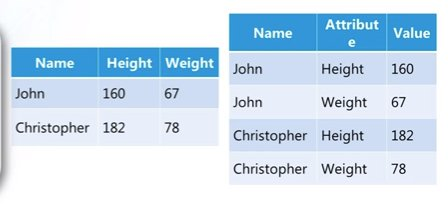

**Wide format** is where we have a single row for every data point with multiple columns to hold the values of various attributes.

**Long format** is where, for each data point we have as many rows as the number of attributes and each row contains the value of a particular attribute for a given data point.

In [ ]:
# melt -> simple example branch
# wide to long
pd.DataFrame({'cse':[120]}).melt()

# melt -> branch with year
pd.DataFrame({'cse':[120],'ece':[100],'mech':[50]}).melt(var_name='branch',value_name='num_students')

,variable,value
0,cse,120


In [ ]:
pd.DataFrame(
    {
        'branch':['cse','ece','mech'],
        '2020':[100,150,60],
        '2021':[120,130,80],
        '2022':[150,140,70]
    }
).melt(id_vars=['branch'],var_name='year',value_name='students')

,branch,year,students
0,cse,2020,100
1,ece,2020,150
2,mech,2020,60
3,cse,2021,120
4,ece,2021,130
5,mech,2021,80
6,cse,2022,150
7,ece,2022,140
8,mech,2022,70


In [ ]:
# melt -> real world example
confirm = pd.read_excel(file_path, sheet_name='d21_covid19_confirm')
death = pd.read_excel(file_path, sheet_name='d21_covid19_deaths')

In [ ]:
death.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,12/24/22,12/25/22,12/26/22,12/27/22,12/28/22,12/29/22,12/30/22,12/31/22,1/1/23,1/2/23
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,7845,7846,7846,7846,7846,7847,7847,7849,7849,7849
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,3595,3595,3595,3595,3595,3595,3595,3595,3595,3595
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,6881,6881,6881,6881,6881,6881,6881,6881,6881,6881
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,165,165,165,165,165,165,165,165,165,165
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,1928,1928,1928,1930,1930,1930,1930,1930,1930,1930


In [ ]:
confirm.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,12/24/22,12/25/22,12/26/22,12/27/22,12/28/22,12/29/22,12/30/22,12/31/22,1/1/23,1/2/23
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,207310,207399,207438,207460,207493,207511,207550,207559,207616,207627
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,333749,333749,333751,333751,333776,333776,333806,333806,333811,333812
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,271194,271198,271198,271202,271208,271217,271223,271228,271229,271229
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,47686,47686,47686,47686,47751,47751,47751,47751,47751,47751
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,104973,104973,104973,105095,105095,105095,105095,105095,105095,105095


In [ ]:
death = death.melt(id_vars=['Province/State','Country/Region','Lat','Long'],var_name='date',value_name='num_deaths')
confirm = confirm.melt(id_vars=['Province/State','Country/Region','Lat','Long'],var_name='date',value_name='num_cases')

In [ ]:
death.head()

,Province/State,Country/Region,Lat,Long,date,num_deaths
0,NaN,Afghanistan,33.93911,67.709953,1/22/20,0
1,NaN,Albania,41.15330,20.168300,1/22/20,0
2,NaN,Algeria,28.03390,1.659600,1/22/20,0
3,NaN,Andorra,42.50630,1.521800,1/22/20,0
4,NaN,Angola,-11.20270,17.873900,1/22/20,0


In [ ]:
confirm.merge(death,on=['Province/State','Country/Region','Lat','Long','date'])[['Country/Region','date','num_cases','num_deaths']]

,Country/Region,date,num_cases,num_deaths
0,Afghanistan,1/22/20,0,0
1,Albania,1/22/20,0,0
2,Algeria,1/22/20,0,0
3,Andorra,1/22/20,0,0
4,Angola,1/22/20,0,0
...,...,...,...,...
311248,West Bank and Gaza,1/2/23,703228,5708
311249,Winter Olympics 2022,1/2/23,535,0
311250,Yemen,1/2/23,11945,2159
311251,Zambia,1/2/23,334661,4024


### Pivot Table

The pivot table takes simple column-wise data as input, and groups the entries into a two-dimensional table that provides a multidimensional summarization of the data.

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns

In [ ]:
df = sns.load_dataset('tips')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [ ]:
df.groupby('sex')[['total_bill']].mean()

,total_bill
sex,
Male,20.744076
Female,18.056897


In [ ]:
df.groupby(['sex','smoker'])[['total_bill']].mean().unstack()

total_bill           
smoker        Yes         No
sex                         
Male    22.284500  19.791237
Female  17.977879  18.105185

In [ ]:
df.pivot_table(index='sex',columns='smoker',values='total_bill', aggfunc='sum')

smoker,Yes,No
sex,,
Male,1337.07,1919.75
Female,593.27,977.68


In [ ]:
# aggfunc
df.pivot_table(index='sex',columns='smoker',values='total_bill',aggfunc='std')

smoker,Yes,No
sex,,
Male,9.911845,8.726566
Female,9.189751,7.286455


In [ ]:
# all cols together
df.pivot_table(index='sex',columns='smoker')
df.pivot_table(index='sex',columns='smoker')['size']

<ipython-input-19-620fa0d4e319>:1: FutureWarning: pivot_table dropped a column because it failed to aggregate. This behavior is deprecated and will raise in a future version of pandas. Select only the columns that can be aggregated.
  df.pivot_table(index='sex',columns='smoker')


size                 tip           total_bill           
smoker       Yes        No       Yes        No        Yes         No
sex                                                                 
Male    2.500000  2.711340  3.051167  3.113402  22.284500  19.791237
Female  2.242424  2.592593  2.931515  2.773519  17.977879  18.105185

In [ ]:
# multidimensional
df.pivot_table(index=['sex','smoker'],columns=['day','time'],aggfunc={'size':'mean','tip':'max','total_bill':'sum'},margins=True)
df.pivot_table(index=['sex','smoker'],columns=['time'],aggfunc={'total_bill':['count',np.sum, np.mean]})

total_bill                                              
                   count              mean                sum         
time               Lunch Dinner      Lunch     Dinner   Lunch   Dinner
sex    smoker                                                         
Male   Yes            13     47  17.374615  23.642553  225.87  1111.20
       No             20     77  18.486500  20.130130  369.73  1550.02
Female Yes            10     23  17.431000  18.215652  174.31   418.96
       No             25     29  15.902400  20.004138  397.56   580.12

In [ ]:
# margins
df.pivot_table(index='sex',columns='smoker',values='total_bill',aggfunc='sum',margins=True)

smoker,Yes,No,All
sex,,,
Male,1337.07,1919.75,3256.82
Female,593.27,977.68,1570.95
All,1930.34,2897.43,4827.77


In [ ]:
# plotting graphs
df = pd.read_csv('/content/expense_data.csv')

In [ ]:
df.head()
df.info()


,Date,Account,Category,Subcategory,Note,INR,Income/Expense,Note.1,Amount,Currency,Account.1
0,3/2/2022 10:11,CUB - online payment,Food,NaN,Brownie,50.0,Expense,NaN,50.0,INR,50.0
1,3/2/2022 10:11,CUB - online payment,Other,NaN,To lended people,300.0,Expense,NaN,300.0,INR,300.0
2,3/1/2022 19:50,CUB - online payment,Food,NaN,Dinner,78.0,Expense,NaN,78.0,INR,78.0
3,3/1/2022 18:56,CUB - online payment,Transportation,NaN,Metro,30.0,Expense,NaN,30.0,INR,30.0
4,3/1/2022 18:22,CUB - online payment,Food,NaN,Snacks,67.0,Expense,NaN,67.0,INR,67.0


In [ ]:
df['Category'].value_counts()

Food                156
Other                60
Transportation       31
Apparel               7
Household             6
Allowance             6
Social Life           5
Education             1
Salary                1
Self-development      1
Beauty                1
Gift                  1
Petty cash            1
Name: Category, dtype: int64

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])
df.info()
df['month'] = df['Date'].dt.month_name()
df.head()


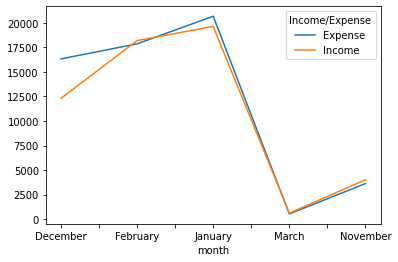

In [ ]:
df.pivot_table(index='month',columns='Category',values='INR',aggfunc='sum',fill_value=0).plot()
df.pivot_table(index='month',columns='Income/Expense',values='INR',aggfunc='sum',fill_value=0).plot()


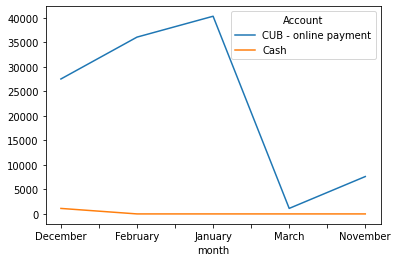

In [ ]:
df.pivot_table(index='month',columns='Account',values='INR',aggfunc='sum',fill_value=0).plot()

## L22.0-date_and_time_in_pandas

### Date & time : CAMPUSX

In [ ]:
import numpy as np
import pandas as pd

import datetime as dt


### Timestamp Object

Time stamps reference particular moments in time (e.g., Oct 24th, 2022 at 7:00pm)

### Creating Timestamp objects

In [ ]:
# creating a timestamp
type(pd.Timestamp('2023/1/15'))
# variations
pd.Timestamp('2023-1-15')
pd.Timestamp('2023, 1, 15')
# only year
pd.Timestamp('2023')
# using text
pd.Timestamp('15th January 2023')
# providing time also
pd.Timestamp('15th January 2023 9:21AM')
# pd.Timestamp('2023/1/5/9/21') # will throw error.
# AM and PM
# using datetime.datetime object
import datetime as dt

x = pd.Timestamp(dt.datetime(2023,1,5,9,21,56))
x
# fetching attributes
x.year
x.month
x.day
x.hour
x.minute
x.second

Timestamp('2023-01-15 00:00:00')

In [ ]:
# why separate objects to handle data and time when python already has datetime functionality?

- syntax wise datetime is very convenient
- But the performance takes a hit while working with huge data. List vs Numpy Array
- The weaknesses of Python's datetime format inspired the NumPy team to add a set of native time series data type to NumPy.
- The datetime64 dtype encodes dates as 64-bit integers, and thus allows arrays of dates to be represented very compactly.

In [ ]:
import numpy as np
date = np.array('2015-07-04', dtype=np.datetime64)
date
date + np.arange(12)

array('2015-07-04', dtype='datetime64[D]')

- Because of the uniform type in NumPy datetime64 arrays, this type of operation can be accomplished much more quickly than if we were working directly with Python's datetime objects, especially as arrays get large

- Pandas Timestamp object combines the ease-of-use of python datetime with the efficient storage and vectorized interface of numpy.datetime64

- From a group of these Timestamp objects, Pandas can construct a DatetimeIndex that can be used to index data in a Series or DataFrame

### DatetimeIndex Object

A collection of pandas timestamp

In [ ]:
# from strings
type(pd.DatetimeIndex(['2023/1/1','2022/1/1','2021/1/1']))

# using python datetime object
pd.DatetimeIndex([dt.datetime(2023,1,1),dt.datetime(2022,1,1),dt.datetime(2021,1,1)])

# using pd.timestamps
dt_index = pd.DatetimeIndex([pd.Timestamp(2023,1,1),pd.Timestamp(2022,1,1),pd.Timestamp(2021,1,1)])

# using datetimeindex as series index
pd.Series([1,2,3],index=dt_index)

pandas.core.indexes.datetimes.DatetimeIndex

### date_range function



In [ ]:
# generate daily dates in a given range
pd.date_range(start='2023/1/5',end='2023/2/28',freq='1D')
# alternate days in a given range
pd.date_range(start='2023/1/5',end='2023/2/28',freq='2D')
# B -> business days
pd.date_range(start='2023/1/5',end='2023/2/28',freq='B')
# W -> one week per day
pd.date_range(start='2023/1/5',end='2023/2/28',freq='W-THU')
# H -> Hourly data(factor)
pd.date_range(start='2023/1/5',end='2023/2/28',freq='6H')
# M -> Month end
pd.date_range(start='2023/1/5',end='2023/2/28',freq='M')
# MS -> Month start
pd.date_range(start='2023/1/5',end='2023/2/28',freq='MS')
# A -> Year end
pd.date_range(start='2023/1/5',end='2030/2/28',freq='A')

In [3]:
# using periods(number of results)
pd.date_range(start='2023/1/5',periods=10,freq='M')

DatetimeIndex(['2023-01-31', '2023-02-28', '2023-03-31', '2023-04-30',
               '2023-05-31', '2023-06-30', '2023-07-31', '2023-08-31',
               '2023-09-30', '2023-10-31'],
              dtype='datetime64[ns]', freq='M')

### to_datetime function

converts an existing objects to pandas timestamp/datetimeindex object

In [ ]:
# simple series example

s = pd.Series(['2023/1/1','2022/1/1','2021/1/1'])
pd.to_datetime(s).dt.day_name()

# with errors
s = pd.Series(['2023/1/1','2022/1/1','2021/130/1'])
pd.to_datetime(s,errors='coerce').dt.month_name()

0      Sunday
1    Saturday
2      Friday
dtype: object

In [ ]:
df = pd.read_csv('/content/expense_data.csv')
df.shape

(277, 11)

In [ ]:
df.head()

,Date,Account,Category,Subcategory,Note,INR,Income/Expense,Note.1,Amount,Currency,Account.1
0,3/2/2022 10:11,CUB - online payment,Food,NaN,Brownie,50.0,Expense,NaN,50.0,INR,50.0
1,3/2/2022 10:11,CUB - online payment,Other,NaN,To lended people,300.0,Expense,NaN,300.0,INR,300.0
2,3/1/2022 19:50,CUB - online payment,Food,NaN,Dinner,78.0,Expense,NaN,78.0,INR,78.0
3,3/1/2022 18:56,CUB - online payment,Transportation,NaN,Metro,30.0,Expense,NaN,30.0,INR,30.0
4,3/1/2022 18:22,CUB - online payment,Food,NaN,Snacks,67.0,Expense,NaN,67.0,INR,67.0


In [ ]:
df['Date'] = pd.to_datetime(df['Date'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 277 entries, 0 to 276
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            277 non-null    datetime64[ns]
 1   Account         277 non-null    object        
 2   Category        277 non-null    object        
 3   Subcategory     0 non-null      float64       
 4   Note            273 non-null    object        
 5   INR             277 non-null    float64       
 6   Income/Expense  277 non-null    object        
 7   Note.1          0 non-null      float64       
 8   Amount          277 non-null    float64       
 9   Currency        277 non-null    object        
 10  Account.1       277 non-null    float64       
dtypes: datetime64[ns](1), float64(5), object(5)
memory usage: 23.9+ KB


### dt accessor

Accessor object for datetimelike properties of the Series values.

In [ ]:
df['Date'].dt.is_quarter_start
df[df['Date'].dt.is_month_end]


0      False
1      False
2      False
3      False
4      False
       ...  
272    False
273    False
274    False
275    False
276    False
Name: Date, Length: 277, dtype: bool

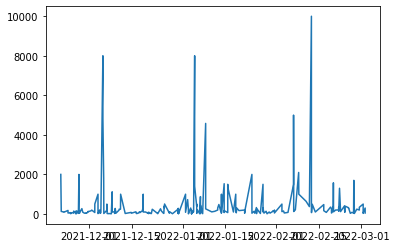

In [ ]:
# plot graph
import matplotlib.pyplot as plt
plt.plot(df['Date'],df['INR'])

In [ ]:
# day name wise bar chart/month wise bar chart

df['day_name'] = df['Date'].dt.day_name()
df.head()
df.groupby('day_name')['INR'].mean().plot(kind='bar')
df['month_name'] = df['Date'].dt.month_name()
df.head()
df.groupby('month_name')['INR'].sum().plot(kind='bar')

In [ ]:
df[df['Date'].dt.is_month_end]

,Date,Account,Category,Subcategory,Note,INR,Income/Expense,Note.1,Amount,Currency,Account.1,day_name,month_name
7,2022-02-28 11:56:00,CUB - online payment,Food,NaN,Pizza,339.15,Expense,NaN,339.15,INR,339.15,Monday,February
8,2022-02-28 11:45:00,CUB - online payment,Other,NaN,From kumara,200.00,Income,NaN,200.00,INR,200.00,Monday,February
61,2022-01-31 08:44:00,CUB - online payment,Transportation,NaN,Vnr to apk,50.00,Expense,NaN,50.00,INR,50.00,Monday,January
62,2022-01-31 08:27:00,CUB - online payment,Other,NaN,To vicky,200.00,Expense,NaN,200.00,INR,200.00,Monday,January
63,2022-01-31 08:26:00,CUB - online payment,Transportation,NaN,To ksr station,153.00,Expense,NaN,153.00,INR,153.00,Monday,January
242,2021-11-30 14:24:00,CUB - online payment,Gift,NaN,Bharath birthday,115.00,Expense,NaN,115.00,INR,115.00,Tuesday,November
243,2021-11-30 14:17:00,CUB - online payment,Food,NaN,Lunch with company,128.00,Expense,NaN,128.00,INR,128.00,Tuesday,November
244,2021-11-30 10:11:00,CUB - online payment,Food,NaN,Breakfast,70.00,Expense,NaN,70.00,INR,70.00,Tuesday,November


### Date & time--Data School

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
ufo=pd.read_csv('http://bit.ly/uforeports')

In [6]:
ufo.head()

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00
3,Abilene,NaN,DISK,KS,6/1/1931 13:00
4,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00


In [ ]:
ufo.dtypes

City               object
Colors Reported    object
Shape Reported     object
State              object
Time               object
dtype: object

In [ ]:
ufo['Time'].str.slice(-5,-3).astype(int).head()

0    22
1    20
2    14
3    13
4    19
Name: Time, dtype: int32

In [ ]:
ufo.head()

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00
3,Abilene,NaN,DISK,KS,6/1/1931 13:00
4,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00


In [ ]:
ufo['Time']=pd.to_datetime(ufo['Time'])

In [ ]:
ufo.dtypes

City                       object
Colors Reported            object
Shape Reported             object
State                      object
Time               datetime64[ns]
dtype: object

In [ ]:
ufo['hour']=ufo['Time'].dt.hour

In [ ]:
ufo.head()

,City,Colors Reported,Shape Reported,State,Time,hour
0,Ithaca,NaN,TRIANGLE,NY,1930-06-01 22:00:00,22
1,Willingboro,NaN,OTHER,NJ,1930-06-30 20:00:00,20
2,Holyoke,NaN,OVAL,CO,1931-02-15 14:00:00,14
3,Abilene,NaN,DISK,KS,1931-06-01 13:00:00,13
4,New York Worlds Fair,NaN,LIGHT,NY,1933-04-18 19:00:00,19


In [ ]:
ts=pd.to_datetime('1/1/1999')

In [ ]:
ufo[ufo['Time']>ts]

,City,Colors Reported,Shape Reported,State,Time,hour
12832,Loma Rica,NaN,LIGHT,CA,1999-01-01 02:30:00,2
12833,Bauxite,NaN,NaN,AR,1999-01-01 03:00:00,3
12834,Florence,NaN,CYLINDER,SC,1999-01-01 14:00:00,14
12835,Lake Henshaw,NaN,CIGAR,CA,1999-01-01 15:00:00,15
12836,Wilmington Island,NaN,LIGHT,GA,1999-01-01 17:15:00,17
...,...,...,...,...,...,...
18236,Grant Park,NaN,TRIANGLE,IL,2000-12-31 23:00:00,23
18237,Spirit Lake,NaN,DISK,IA,2000-12-31 23:00:00,23
18238,Eagle River,NaN,NaN,WI,2000-12-31 23:45:00,23
18239,Eagle River,RED,LIGHT,WI,2000-12-31 23:45:00,23


In [ ]:
ufo.head()

,City,Colors Reported,Shape Reported,State,Time,hour
0,Ithaca,NaN,TRIANGLE,NY,1930-06-01 22:00:00,22
1,Willingboro,NaN,OTHER,NJ,1930-06-30 20:00:00,20
2,Holyoke,NaN,OVAL,CO,1931-02-15 14:00:00,14
3,Abilene,NaN,DISK,KS,1931-06-01 13:00:00,13
4,New York Worlds Fair,NaN,LIGHT,NY,1933-04-18 19:00:00,19


In [ ]:
ufo['Year']=ufo['Time'].dt.year
ufo.head()

,City,Colors Reported,Shape Reported,State,Time,hour,Year
0,Ithaca,NaN,TRIANGLE,NY,1930-06-01 22:00:00,22,1930
1,Willingboro,NaN,OTHER,NJ,1930-06-30 20:00:00,20,1930
2,Holyoke,NaN,OVAL,CO,1931-02-15 14:00:00,14,1931
3,Abilene,NaN,DISK,KS,1931-06-01 13:00:00,13,1931
4,New York Worlds Fair,NaN,LIGHT,NY,1933-04-18 19:00:00,19,1933


<AxesSubplot:xlabel='Year'>

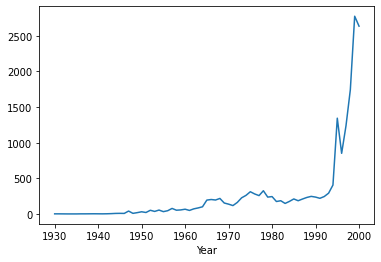

In [ ]:
# ufo.groupby('Year')['Year'].count().plot(kind='line')
ufo.value_counts('Year').sort_index().plot()

### Date & Time Corey Schafer

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv('L_22_DATASET_COREY_Timeseries_ETH_1h.csv')

In [ ]:
df.head()
df.info()

df['Date']=pd.to_datetime(df['Date'],format='%Y-%m-%d %I-%p')

,Date,Symbol,Open,High,Low,Close,Volume
0,2020-03-13 08-PM,ETHUSD,129.94,131.82,126.87,128.71,1940673.93
1,2020-03-13 07-PM,ETHUSD,119.51,132.02,117.10,129.94,7579741.09
2,2020-03-13 06-PM,ETHUSD,124.47,124.85,115.50,119.51,4898735.81
3,2020-03-13 05-PM,ETHUSD,124.08,127.42,121.63,124.47,2753450.92
4,2020-03-13 04-PM,ETHUSD,124.85,129.51,120.17,124.08,4461424.71


In [ ]:
df.dtypes

Date      datetime64[ns]
Symbol            object
Open             float64
High             float64
Low              float64
Close            float64
Volume           float64
dtype: object

In [ ]:
df.head()

,Date,Symbol,Open,High,Low,Close,Volume
0,2020-03-13 20:00:00,ETHUSD,129.94,131.82,126.87,128.71,1940673.93
1,2020-03-13 19:00:00,ETHUSD,119.51,132.02,117.10,129.94,7579741.09
2,2020-03-13 18:00:00,ETHUSD,124.47,124.85,115.50,119.51,4898735.81
3,2020-03-13 17:00:00,ETHUSD,124.08,127.42,121.63,124.47,2753450.92
4,2020-03-13 16:00:00,ETHUSD,124.85,129.51,120.17,124.08,4461424.71


In [ ]:
df.loc[0,'Date'].day_name() #.dt not req for timestamp type

'Friday'

In [ ]:
# what if we want to do all this transformation during loading the data
d_parser=lambda x:pd.datetime.strptime(x, '%Y-%m-%d %I-%p') #when input is single date object.
pd.to_datetime(df['Date'],format='%Y-%m-%d %I-%p') #when input is a series of date.
df=pd.read_csv('L_22_DATASET_COREY_Timeseries_ETH_1h.csv',parse_dates=['Date'],date_parser=d_parser)

<ipython-input-60-ba73bb4f500a>:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  d_parser=lambda x:pd.datetime.strptime(x, '%Y-%m-%d %I-%p') #when input is single date object.


## L22.0 - Strings

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
# What are vectorized operations
a = np.array([1,2,3,4])
a * 4

array([ 4,  8, 12, 16])

In [ ]:
# problem in vectorized opertions in vanilla python
s = ['cat','mat',None,'rat']
[i.startswith('c') for i in s]


# How pandas solves this issue?
s = pd.Series(['cat','mat',None,'rat'])
# string accessor
s.str.startswith('c')
    # pandas method is fast and optimized

AttributeError: ignored

In [ ]:
# import titanic
df = pd.read_csv('/content/titanic.csv')
titanic = pd.read_excel(file_path, sheet_name='d22_titanic')

df['Name']

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [ ]:
# Common Functions
# lower/upper/capitalize/title
df['Name'].str.upper()
df['Name'].str.capitalize()
df['Name'].str.title()  # capitalize the 1st letter of each word
# len
df['Name'][df['Name'].str.len() == 82].values[0]

# strip
"                   nitish                              ".strip()
df['Name'].str.strip()

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [ ]:
# split -> get
df['lastname'] = df['Name'].str.split(',').str.get(0)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,lastname
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Cumings
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Futrelle
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Allen


In [ ]:
df[['title','firstname']] = df['Name'].str.split(',').str.get(1).str.strip().str.split(' ', n=1, expand=True) #expand converts the result into a dataframe.
df.head()
df['title'].value_counts()

# replace
df['title'] = df['title'].str.replace('Ms.','Miss.')
df['title'] = df['title'].str.replace('Mlle.','Miss.')

df['title'].value_counts()


Mr.          517
Miss.        182
Mrs.         125
Master.       40
Dr.            7
Rev.           6
Mlle.          2
Major.         2
Col.           2
the            1
Capt.          1
Ms.            1
Sir.           1
Lady.          1
Mme.           1
Don.           1
Jonkheer.      1
Name: title, dtype: int64

In [ ]:
# filtering
# startswith/endswith
df[df['firstname'].str.endswith('A')]
# isdigit/isalpha...
df[df['firstname'].str.isdigit()]

# contains
    # search john -> both case(upper, lower)
df[df['firstname'].str.contains('john',case=False)] # case=False implies that not case sensitive.
# applying regex
# find lastnames with start and end char vowel
df[df['lastname'].str.contains('^[^aeiouAEIOU].+[^aeiouAEIOU]$')]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,lastname,title,firstname


In [ ]:
# slicing
df['Name'].str[::-1]

0                                sirraH newO .rM ,dnuarB
1      )reyahT sggirB ecnerolF( yeldarB nhoJ .srM ,sg...
2                                 aniaL .ssiM ,nenikkieH
3           )leeP yaM yliL( htaeH seuqcaJ .srM ,ellertuF
4                               yrneH mailliW .rM ,nellA
                             ...                        
886                                sazouJ .veR ,alivtnoM
887                         htidE teragraM .ssiM ,maharG
888             "eirraC" neleH enirehtaC .ssiM ,notsnhoJ
889                                llewoH lraK .rM ,rheB
890                                  kcirtaP .rM ,yelooD
Name: Name, Length: 891, dtype: object

## L-22.1-CASE_STUDY_datetime1

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
# till now
# Timestamp
pd.Timestamp('6th jan 2023 8:10')
# DatetimeIndex(collection  of timestamps) -> can be made index of df or series.
pd.DatetimeIndex([pd.Timestamp('6th jan 2023 8:10'),pd.Timestamp('7th jan 2023 8:10'),pd.Timestamp('8th jan 2023 8:10')])[0]
# date_range()
pd.date_range(start='2023-1-6',end='2023-1-31',freq='D')
# to_datetime()
s = pd.Series(['2023/1/6','2023/1/7','2023/1/7'])
pd.to_datetime(s).dt.day_name()

0      Friday
1    Saturday
2    Saturday
dtype: object

### Timedelta Object

Represents a duration, the difference between two dates or times.

In [ ]:
# create using Timestamp objects
t1 = pd.Timestamp('6th Jan 2023 8:20:14')
t2 = pd.Timestamp('26th Jan 2023 10:00:00')

t2 - t1

Timedelta('20 days 01:39:46')

In [ ]:
# standalone creation
pd.Timedelta(days=2,hours=10,minutes=35)

Timedelta('2 days 10:35:00')

In [ ]:
# Arithmetic
pd.Timestamp('6th jan 2023') + pd.Timedelta(days=2,hours=10,minutes=35)

Timestamp('2023-01-08 10:35:00')

In [ ]:
pd.date_range(start='2023-1-6',end='2023-1-31',freq='D') - pd.Timedelta(days=2,hours=10,minutes=35)

DatetimeIndex(['2023-01-03 13:25:00', '2023-01-04 13:25:00',
               '2023-01-05 13:25:00', '2023-01-06 13:25:00',
               '2023-01-07 13:25:00', '2023-01-08 13:25:00',
               '2023-01-09 13:25:00', '2023-01-10 13:25:00',
               '2023-01-11 13:25:00', '2023-01-12 13:25:00',
               '2023-01-13 13:25:00', '2023-01-14 13:25:00',
               '2023-01-15 13:25:00', '2023-01-16 13:25:00',
               '2023-01-17 13:25:00', '2023-01-18 13:25:00',
               '2023-01-19 13:25:00', '2023-01-20 13:25:00',
               '2023-01-21 13:25:00', '2023-01-22 13:25:00',
               '2023-01-23 13:25:00', '2023-01-24 13:25:00',
               '2023-01-25 13:25:00', '2023-01-26 13:25:00',
               '2023-01-27 13:25:00', '2023-01-28 13:25:00'],
              dtype='datetime64[ns]', freq='D')

In [ ]:
# real life example
df = pd.read_csv('order_delivery.csv')
order_delivery = pd.read_excel(file_path, sheet_name='d22_order_delivery')

df.head()

,order_date,delivery_date
0,5/24/98,2/5/99
1,4/22/92,3/6/98
2,2/10/91,8/26/92
3,7/21/92,11/20/97
4,9/2/93,6/10/98


In [ ]:
df['order_date'] = pd.to_datetime(df['order_date'])
df['delivery_date'] = pd.to_datetime(df['delivery_date'])

In [ ]:
df['delivery_time_period'] = df['delivery_date'] - df['order_date']

df['delivery_time_period'].mean()

Timedelta('1217 days 22:53:53.532934128')

### Time series

A time series is a data set that tracks a sample over time. In particular, a time series allows one to see what factors influence certain variables from period to period. Time series analysis can be useful to see how a given asset, security, or economic variable changes over time.

Examples

- Financial Data (Company stocks)
- Natural Data (Rainfall measurement)
- Event Data (Covid)
- Medical Data (Heart rate monitoring)

Types of Operations done on Time Series

- Time Series Analysis
- Time Series Forecasting

In [ ]:
google = pd.read_csv('google.csv')
google = pd.read_excel(file_path, sheet_name='d22_google')

google.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-19,49.813290,51.835709,47.800831,49.982655,49.982655,44871361
1,2004-08-20,50.316402,54.336334,50.062355,53.952770,53.952770,22942874
2,2004-08-23,55.168217,56.528118,54.321388,54.495735,54.495735,18342897
3,2004-08-24,55.412300,55.591629,51.591621,52.239197,52.239197,15319808
4,2004-08-25,52.284027,53.798351,51.746044,52.802086,52.802086,9232276


In [ ]:
google.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
4466,2022-05-16,2307.679932,2332.149902,2286.699951,2295.850098,2295.850098,1164100
4467,2022-05-17,2344.550049,2344.550049,2306.750000,2334.030029,2334.030029,1078800
4468,2022-05-18,2304.750000,2313.913086,2242.840088,2248.020020,2248.020020,1399100
4469,2022-05-19,2236.820068,2271.750000,2209.360107,2214.909912,2214.909912,1459600
4470,2022-05-20,2241.709961,2251.000000,2127.459961,2186.260010,2186.260010,1878100


In [ ]:
subs = pd.read_csv('subscribers.csv')
views = pd.read_csv('views.csv')
wt = pd.read_csv('watch-time.csv')
comments = pd.read_csv('comments.csv')

In [ ]:
comments.tail()

,Date,Comments added
1354,2022-12-31,20
1355,2023-01-01,13
1356,2023-01-02,66
1357,2023-01-03,22
1358,2023-01-04,21


In [ ]:
yt = subs.merge(views,on='Date').merge(wt,on='Date').merge(comments,on='Date')

In [ ]:
yt.head()

,Date,Subscribers,Views,Watch time (hours),Comments added
0,2019-04-17,0,0,0.0,0
1,2019-04-18,0,0,0.0,0
2,2019-04-19,0,0,0.0,0
3,2019-04-20,0,0,0.0,0
4,2019-04-21,0,0,0.0,0


In [ ]:
google['Date'] = pd.to_datetime(google['Date'])
yt['Date'] = pd.to_datetime(yt['Date'])

In [ ]:
yt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1359 entries, 0 to 1358
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Date                1359 non-null   datetime64[ns]
 1   Subscribers         1359 non-null   int64         
 2   Views               1359 non-null   int64         
 3   Watch time (hours)  1359 non-null   float64       
 4   Comments added      1359 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(3)
memory usage: 63.7 KB


In [ ]:
google.set_index('Date',inplace=True)
yt.set_index('Date',inplace=True)

In [ ]:
yt.head()

,Subscribers,Views,Watch time (hours),Comments added
Date,,,,
2019-04-17,0,0,0.0,0
2019-04-18,0,0,0.0,0
2019-04-19,0,0,0.0,0
2019-04-20,0,0,0.0,0
2019-04-21,0,0,0.0,0


In [ ]:
# fetch a specific date
google.loc['2021-12-30']

Open           2929.000000
High           2941.250000
Low            2915.169922
Close          2920.050049
Adj Close      2920.050049
Volume       648900.000000
Name: 2021-12-30 00:00:00, dtype: float64

In [ ]:
# partial indexing -> select a particular year/month
yt.loc['2022-12'] # to select a particular month
yt.loc['2022']      # to select a particular year.

,Subscribers,Views,Watch time (hours),Comments added
Date,,,,
2022-01-01,30,3111,327.3357,11
2022-01-02,42,4109,402.5877,5
2022-01-03,45,4264,431.8496,13
2022-01-04,53,4160,427.6701,7
2022-01-05,32,3971,433.6201,8
...,...,...,...,...
2022-12-27,201,18245,2228.4891,18
2022-12-28,191,18355,2174.0347,21
2022-12-29,142,17247,2115.5851,21


In [ ]:
# create year month-name and day-name
yt['month_name'] = yt.index.month_name()
yt['weekday_name'] = yt.index.day_name()
yt['quarter'] = yt.index.quarter

In [ ]:
yt.head()

,Subscribers,Views,Watch time (hours),Comments added,month_name,weekdday_name,quarter,weekday_name
Date,,,,,,,,
2019-04-17,0,0,0.0,0,April,April,2,Wednesday
2019-04-18,0,0,0.0,0,April,April,2,Thursday
2019-04-19,0,0,0.0,0,April,April,2,Friday
2019-04-20,0,0,0.0,0,April,April,2,Saturday
2019-04-21,0,0,0.0,0,April,April,2,Sunday


In [ ]:
google['month_name'] = google.index.month_name()
google['weekday_name'] = google.index.day_name()
google['quarter'] = google.index.quarter

google.head()

,Open,High,Low,Close,Adj Close,Volume,month_name,weekday_name,quarter
Date,,,,,,,,,
2004-08-19,49.813290,51.835709,47.800831,49.982655,49.982655,44871361,August,Thursday,3
2004-08-20,50.316402,54.336334,50.062355,53.952770,53.952770,22942874,August,Friday,3
2004-08-23,55.168217,56.528118,54.321388,54.495735,54.495735,18342897,August,Monday,3
2004-08-24,55.412300,55.591629,51.591621,52.239197,52.239197,15319808,August,Tuesday,3
2004-08-25,52.284027,53.798351,51.746044,52.802086,52.802086,9232276,August,Wednesday,3


In [ ]:
# slicing
yt.loc['2022-12-15':'2023-1-1':2]

,Subscribers,Views,Watch time (hours),Comments added,month_name,weekdday_name,quarter,weekday_name
Date,,,,,,,,
2022-12-15,176,20396,2730.0469,24,December,December,4,Thursday
2022-12-17,180,16207,1967.5637,20,December,December,4,Saturday
2022-12-19,171,19193,2251.5935,30,December,December,4,Monday
2022-12-21,185,20380,2781.9778,25,December,December,4,Wednesday
2022-12-23,144,15855,1882.2075,22,December,December,4,Friday
2022-12-25,148,16026,2033.8560,32,December,December,4,Sunday
2022-12-27,201,18245,2228.4891,18,December,December,4,Tuesday
2022-12-29,142,17247,2115.5851,21,December,December,4,Thursday
2022-12-31,116,12468,1446.5901,20,December,December,4,Saturday


In [ ]:
# challenge -> fetch info for a particular date every year -> limitation of timedelta
google.head()


google[google.index.isin(pd.date_range(start='2005-1-6',end='2022-1-6',freq=pd.DateOffset(years=1)))]

,Open,High,Low,Close,Adj Close,Volume,month_name,weekday_name,quarter
Date,,,,,,,,,
2005-01-06,97.175758,97.584229,93.509506,93.922951,93.922951,20852067,January,Thursday,1
2006-01-06,227.581970,234.371521,225.773743,231.960556,231.960556,35646914,January,Friday,1
2009-01-06,165.868286,169.763687,162.585587,166.406265,166.406265,12898566,January,Tuesday,1
2010-01-06,311.761444,311.761444,302.047852,302.994293,302.994293,7987226,January,Wednesday,1
2011-01-06,304.199799,308.060303,303.885956,305.604523,305.604523,4131026,January,Thursday,1
2012-01-06,328.344299,328.767700,323.681763,323.796326,323.796326,5405987,January,Friday,1
2014-01-06,554.426880,557.340942,551.154114,556.573853,556.573853,3551864,January,Monday,1
2015-01-06,513.589966,514.761719,499.678131,500.585632,500.585632,2899940,January,Tuesday,1
2016-01-06,730.000000,747.179993,728.919983,743.619995,743.619995,1947000,January,Wednesday,1


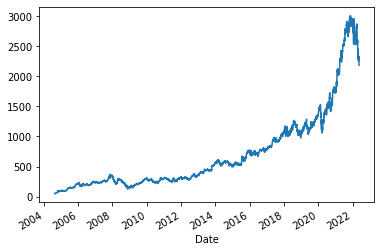

In [ ]:
# viz a single col
google['Close'].plot()

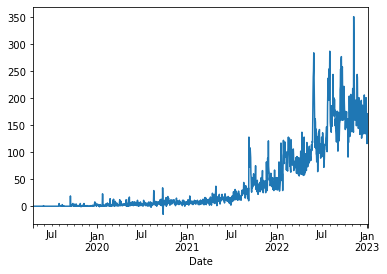

In [ ]:
yt['Subscribers'].plot()

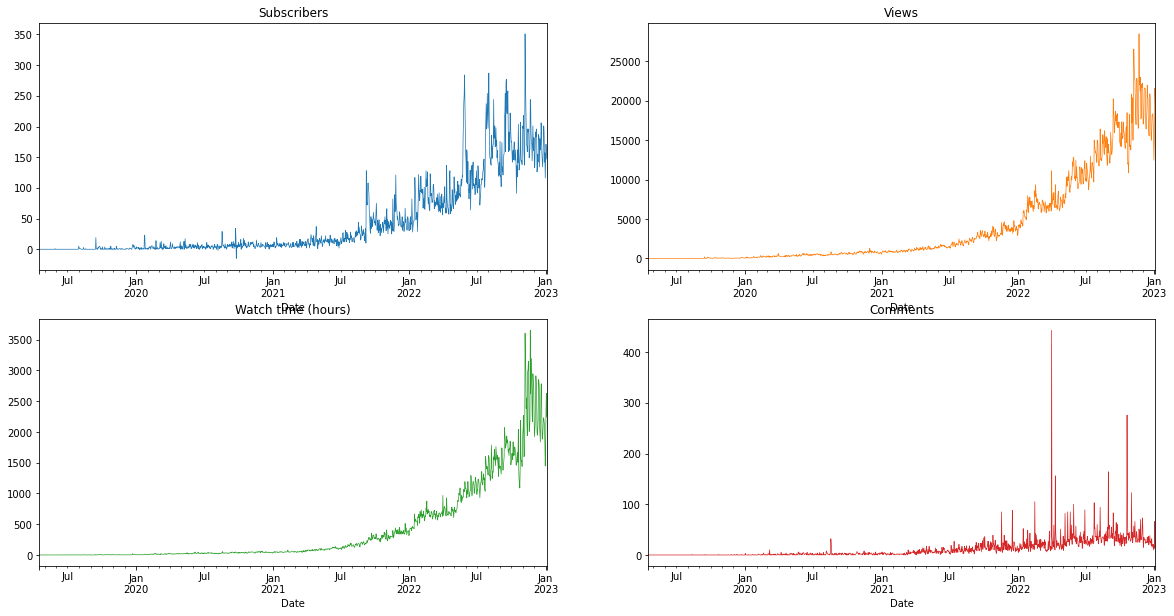

In [ ]:
# viz all cols together
subset_yt = yt[['Subscribers', 'Views', 'Watch time (hours)', 'Comments added']]
ax = subset_yt.plot(subplots=True,
                    layout=(2, 2),
                     sharex=False,
                     sharey=False,
                     linewidth=0.7,
                     fontsize=10,
                     legend=False,
                      figsize=(20,10),
                      title=['Subscribers', 'Views', 'Watch time (hours)', 'Comments'])

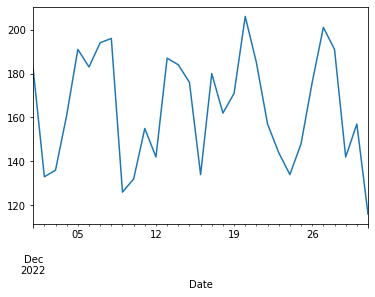

In [ ]:
# plot for a particular year/month/week
yt.loc['2022-12']['Subscribers'].plot()

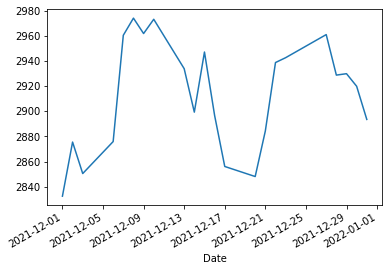

In [ ]:
google.loc['2021-12']['Close'].plot()

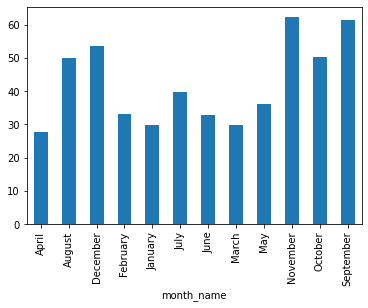

In [ ]:
# monthly trend
yt.groupby('month_name')['Subscribers'].mean().plot(kind='bar')

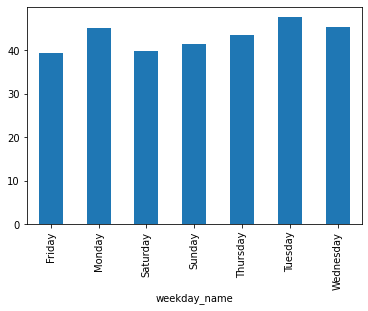

In [ ]:
# yearly trend
yt.groupby('weekday_name')['Subscribers'].mean().plot(kind='bar')

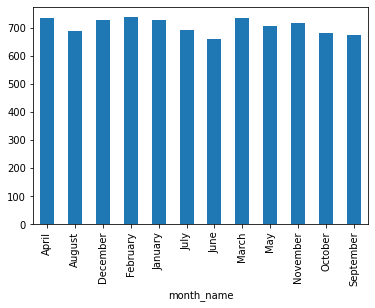

In [ ]:
google.groupby('month_name')['Close'].mean().plot(kind='bar')

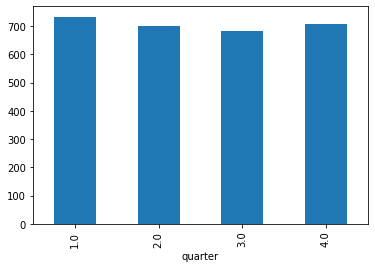

In [ ]:
# quaterly trend
google.groupby('quarter')['Close'].mean().plot(kind='bar')

In [ ]:
# frequency
google.index

DatetimeIndex(['2004-08-19', '2004-08-20', '2004-08-23', '2004-08-24',
               '2004-08-25', '2004-08-26', '2004-08-27', '2004-08-30',
               '2004-08-31', '2004-09-01',
               ...
               '2022-05-09', '2022-05-10', '2022-05-11', '2022-05-12',
               '2022-05-13', '2022-05-16', '2022-05-17', '2022-05-18',
               '2022-05-19', '2022-05-20'],
              dtype='datetime64[ns]', name='Date', length=4632, freq='B')

In [ ]:
# asfreq
google.asfreq('6H',method='bfill')

,Open,High,Low,Close,Adj Close,Volume,month_name,weekday_name,quarter
Date,,,,,,,,,
2004-08-19 00:00:00,49.813290,51.835709,47.800831,49.982655,49.982655,44871361.0,August,Thursday,3.0
2004-08-19 06:00:00,50.316402,54.336334,50.062355,53.952770,53.952770,22942874.0,August,Friday,3.0
2004-08-19 12:00:00,50.316402,54.336334,50.062355,53.952770,53.952770,22942874.0,August,Friday,3.0
2004-08-19 18:00:00,50.316402,54.336334,50.062355,53.952770,53.952770,22942874.0,August,Friday,3.0
2004-08-20 00:00:00,50.316402,54.336334,50.062355,53.952770,53.952770,22942874.0,August,Friday,3.0
...,...,...,...,...,...,...,...,...,...
2022-05-19 00:00:00,2236.820068,2271.750000,2209.360107,2214.909912,2214.909912,1459600.0,May,Thursday,2.0
2022-05-19 06:00:00,2241.709961,2251.000000,2127.459961,2186.260010,2186.260010,1878100.0,May,Friday,2.0
2022-05-19 12:00:00,2241.709961,2251.000000,2127.459961,2186.260010,2186.260010,1878100.0,May,Friday,2.0


### Resampling

Resampling involves changing the frequency of your time series observations.

Two types of resampling are:

**Upsampling**: Where you increase the frequency of the samples, such as from minutes to seconds.<br>
**Downsampling**: Where you decrease the frequency of the samples, such as from days to months.

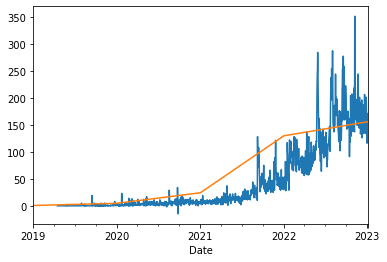

In [ ]:
# Downsampling
yt['Subscribers'].plot()
yt['Subscribers'].resample('Y').mean().plot()

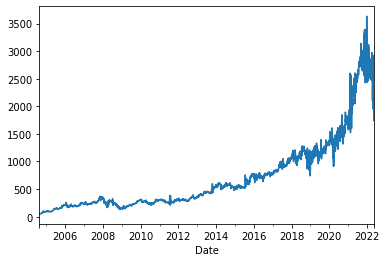

In [ ]:
# Upsampling
google['Close'].resample('12H').interpolate(method='spline',order=2).plot()

### Rolling Window(Smoothing)
Time series data in original format can be quite volatile, especially on smaller aggregation levels. The concept of rolling, or moving averages is a useful technique for smoothing time series data.

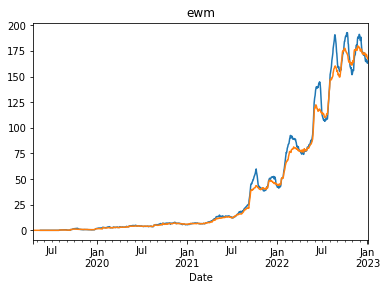

In [ ]:
# Rolling window
yt['Subscribers'].rolling(30).mean().plot(title='rolling')
yt['Subscribers'].ewm(30).mean().plot(title='ewm')


### Shifting

The shift() function is Pandas is used to, well, shift the entire series up or down by the desired number of periods.

In [ ]:
# shift
yt['Subscribers']

Date
2019-04-17      0
2019-04-18      0
2019-04-19      0
2019-04-20      0
2019-04-21      0
             ... 
2022-12-31    116
2023-01-01    142
2023-01-02    171
2023-01-03    162
2023-01-04    147
Name: Subscribers, Length: 1359, dtype: int64

In [ ]:
yt['Subscribers'].shift(-1)

Date
2019-04-17      0.0
2019-04-18      0.0
2019-04-19      0.0
2019-04-20      0.0
2019-04-21      0.0
              ...  
2022-12-31    142.0
2023-01-01    171.0
2023-01-02    162.0
2023-01-03    147.0
2023-01-04      NaN
Name: Subscribers, Length: 1359, dtype: float64

In [ ]:
# shift example
df = pd.read_csv('/content/login.csv',header=None)
df = df[[1,2]]
df.head()
df.rename(columns={1:'user_id',2:'login_time'},inplace=True)
df.head()

,user_id,login_time
0,466,2017-01-07 18:24:07
1,466,2017-01-07 18:24:55
2,458,2017-01-07 18:25:18
3,458,2017-01-07 18:26:21
4,592,2017-01-07 19:09:59


In [ ]:
user_df = df[df['user_id'] == 458]
user_df.head()

,user_id,login_time
2,458,2017-01-07 18:25:18
3,458,2017-01-07 18:26:21
9,458,2017-01-09 11:13:12
10,458,2017-01-09 11:34:02
25,458,2017-01-10 12:14:11


In [ ]:
user_df['login_time'] = pd.to_datetime(user_df['login_time'])
user_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 208 entries, 2 to 1018
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     208 non-null    int64         
 1   login_time  208 non-null    datetime64[ns]
dtypes: datetime64[ns](1), int64(1)
memory usage: 4.9 KB


<ipython-input-269-fd41e73e6ce6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_df['login_time'] = pd.to_datetime(user_df['login_time'])


In [ ]:
user_df['shifted'] = user_df['login_time'].shift(1)
(user_df['login_time'] - user_df['shifted']).mean()

<ipython-input-270-091b95be4a6b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_df['shifted'] = user_df['login_time'].shift(1)


Timedelta('0 days 17:29:22.053140096')

In [ ]:
ax = df.plot(subplots=True,
                    layout=(3, 2),
                     sharex=False,
                     sharey=False,
                     linewidth=0.7,
                     fontsize=10,
                     legend=False,
                      figsize=(20,15),
                      title=['Open', 'High', 'Low', 'Close','Adjusted Close', 'Volume'])